# **Breast Cancer Wisconsin - PCA and ML Classification using R**

This dataset can be found at the [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The dataset contains following attributes:

| Field Name | Description |
| --- | --- |
| id | ID number |
| diagnosis | The diagnosis of breast tissues (M = malignant, B = benign) |
| radius_mean | mean of distances from center to points on the perimeter |
| texture_mean | standard deviation of gray-scale values |
| perimeter_mean | mean size of the core tumor |
| area_mean | --- |
| smoothness_mean | mean of local variation in radius lengths |
| compactness_mean | mean of perimeter^2 / area - 1.0 |
| concavity_mean | mean of severity of concave portions of the contour |
| concave points_mean | mean for number of concave portions of the contour |
| symmetry_mean |  |
| fractal_dimension_mean | mean for "coastline approximation" - 1 |
| radius_se | standard error for the mean of distances from center to points on the perimeter |
| texture_se | standard error for standard deviation of gray-scale values |
| perimeter_se |  |
| area_se |  |
| smoothness_se | standard error for local variation in radius lengths |
| compactness_se | standard error for perimeter^2 / area - 1.0 |
| concavity_se | standard error for severity of concave portions of the contour |
| concave points_se | standard error for number of concave portions of the contour | 
| fractal_dimension_se | standard error for "coastline approximation" - 1 | 
| radius_worst | "worst" or largest mean value for mean of distances from center to points on the perimeter | 
| texture_worst | "worst" or largest mean value for standard deviation of gray-scale values | 
| perimeter_worst |  | 
| area_worst |  | 
| smoothness_worst | "worst" or largest mean value for local variation in radius lengths | 
| compactness_worst | "worst" or largest mean value for perimeter^2 / area - 1.0 | 
| concavity_worst | "worst" or largest mean value for severity of concave portions of the contour | 
| concave points_worst  | "worst" or largest mean value for number of concave portions of the contour  | 
| symmetry_worst  |  | 
| fractal_dimension_worst  | "worst" or largest mean value for "coastline approximation" - 1 | 

Principal Component Analysis, and Machine Learning classification was performed on the dataset. 

Target Variable = "diagnosis"

Predictor Variables = All other except "diagnosis"

## **Loading the required libraries**

In [1]:
library(dplyr)
library(mlbench)
library(tidyr)
library(caret)
library(IRdisplay)
library(xtable)
library(ggplot2)
library(GGally)
library(psych)
library(lattice)
library(rpart)
library(rpart.plot)
library(tree)
library(heatmaply)
library(factoextra)
library(ROCR)
library(knitr)
library(e1071)
library(caTools)
library(gridExtra)
library(kernlab)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'mlbench' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'IRdisplay' was built under R version 3.6.3"

Attaching package: 'xtable'


The following object is masked from 'package:IRdisplay':

    display


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"
Warning message:
"package 'tree' was built under R version 3.6.3"
Warning message:
"package 'h

## **Importing the Dataset**

In [2]:
BC_df = read.csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

# Selecting random 5 rows
BC_df[sample(nrow(BC_df), 5), ]

id       diagnosis radius_mean texture_mean perimeter_mean area_mean
222  8812818 B         13.56       13.90        88.59          561.3    
15  84667401 M         13.73       22.61        93.60          578.3    
404     9047 B         12.94       16.17        83.18          507.6    
559   925277 B         14.59       22.68        96.39          657.1    
16  84799002 M         14.54       27.54        96.73          658.8    
    smoothness_mean compactness_mean concavity_mean concave.points_mean ...
222 0.10510         0.11920          0.07860        0.04451             ...
15  0.11310         0.22930          0.21280        0.08025             ...
404 0.09879         0.08836          0.03296        0.02390             ...
559 0.08473         0.13300          0.10290        0.03736             ...
16  0.11390         0.15950          0.16390        0.07364             ...
    radius_worst texture_worst perimeter_worst area_worst smoothness_worst
222 14.98        17.13         101.10          686.6      0.1376          
15  15.03        32.01         108.80          697.7      0.1651          
404 13.86        23.02          89.69          580.9      0.1172          
559 15.48        27.27         105.90          733.5      0.1026          
16  17.46        37.13         124.10          943.2      0.1678          
    compactness_worst concavity_worst concave.points_worst symmetry_worst
222 0.2698            0.2577          0.09090              0.3065        
15  0.7725            0.6943          0.22080              0.3596        
404 0.1958            0.1810          0.08388              0.3297        
559 0.3171            0.3662          0.11050              0.2258        
16  0.6577            0.7026          0.17120              0.4218        
    fractal_dimension_worst
222 0.08177                
15  0.14310                
404 0.07834                
559 0.08004                
16  0.13410

## **Data Cleaning and Exploration**

### Checking missing value count

In [3]:
library(IRdisplay)
library(xtable)
# Creating a function to determine missing values in each column
nullvalues = function(dataset) {
aa = c()
bb = c()
for (count in 1:length(dataset)) {
  aa <- append(aa,colnames(dataset)[count])
  bb <- append(bb,sum(is.na(dataset[colnames(dataset)[count]])))
}
missing_values=NULL
missing_values$Columns <- aa
missing_values$`Missing Values Count` <- bb
missing_values <- data.frame(missing_values)

display_html(paste(capture.output(print(xtable(missing_values), type = 'html')), collapse="", sep=" "))

}

# Using the function to determine missing values in df
nullvalues(BC_df)

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package --><!-- Fri Jul 23 08:02:29 2021 --> Columns Missing.Values.Count 1 id 0 2 diagnosis 0 3 radius_mean 0 4 texture_mean 0 5 perimeter_mean 0 6 area_mean 0 7 smoothness_mean 0 8 compactness_mean 0 9 concavity_mean 0 10 concave.points_mean 0 11 symmetry_mean 0 12 fractal_dimension_mean 0 13 radius_se 0 14 texture_se 0 15 perimeter_se 0 16 area_se 0 17 smoothness_se 0 18 compactness_se 0 19 concavity_se 0 20 concave.points_se 0 21 symmetry_se 0 22 fractal_dimension_se 0 23 radius_worst 0 24 texture_worst 0 25 perimeter_worst 0 26 area_worst 0 27 smoothness_worst 0 28 compactness_worst 0 29 concavity_worst 0 30 concave.points_worst 0 31 symmetry_worst 0 32 fractal_dimension_worst 0

In [4]:
# Removing the id column
BC_df = BC_df[,-1]

### Summary Statistics

In [5]:
library(vtable)
st(BC_df,out='return', group = "diagnosis")

Loading required package: kableExtra

Warning message:
"package 'kableExtra' was built under R version 3.6.3"

Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows




Variable                N   Mean    SD      N   Mean     SD     
1  diagnosis               B                   M                   
2  radius_mean             357 12.147  1.781   212 17.463   3.204  
3  texture_mean            357 17.915  3.995   212 21.605   3.779  
4  perimeter_mean          357 78.075  11.807  212 115.365  21.855 
5  area_mean               357 462.79  134.287 212 978.376  367.938
6  smoothness_mean         357 0.092   0.013   212 0.103    0.013  
7  compactness_mean        357 0.08    0.034   212 0.145    0.054  
8  concavity_mean          357 0.046   0.043   212 0.161    0.075  
9  concave.points_mean     357 0.026   0.016   212 0.088    0.034  
10 symmetry_mean           357 0.174   0.025   212 0.193    0.028  
11 fractal_dimension_mean  357 0.063   0.007   212 0.063    0.008  
12 radius_se               357 0.284   0.113   212 0.609    0.345  
13 texture_se              357 1.22    0.589   212 1.211    0.483  
14 perimeter_se            357 2       0.771   212 4.324    2.569  
15 area_se                 357 21.135  8.843   212 72.672   61.355 
16 smoothness_se           357 0.007   0.003   212 0.007    0.003  
17 compactness_se          357 0.021   0.016   212 0.032    0.018  
18 concavity_se            357 0.026   0.033   212 0.042    0.022  
19 concave.points_se       357 0.01    0.006   212 0.015    0.006  
20 symmetry_se             357 0.021   0.007   212 0.02     0.01   
21 fractal_dimension_se    357 0.004   0.003   212 0.004    0.002  
22 radius_worst            357 13.38   1.981   212 21.135   4.284  
23 texture_worst           357 23.515  5.494   212 29.318   5.435  
24 perimeter_worst         357 87.006  13.527  212 141.37   29.457 
25 area_worst              357 558.899 163.601 212 1422.286 597.968
26 smoothness_worst        357 0.125   0.02    212 0.145    0.022  
27 compactness_worst       357 0.183   0.092   212 0.375    0.17   
28 concavity_worst         357 0.166   0.14    212 0.451    0.182  
29 concave.points_worst    357 0.074   0.036   212 0.182    0.046  
30 symmetry_worst          357 0.27    0.042   212 0.323    0.075  
31 fractal_dimension_worst 357 0.079   0.014   212 0.092    0.022

### Correlation between different variables 

Asterisk determines significance level of the p-value

"***"
if the p-value is < 0.001

"**"
if the p-value is < 0.01

"*"
if the p-value is < 0.05

"."
if the p-value is < 0.10

""
otherwise

#### Cancer Mean

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



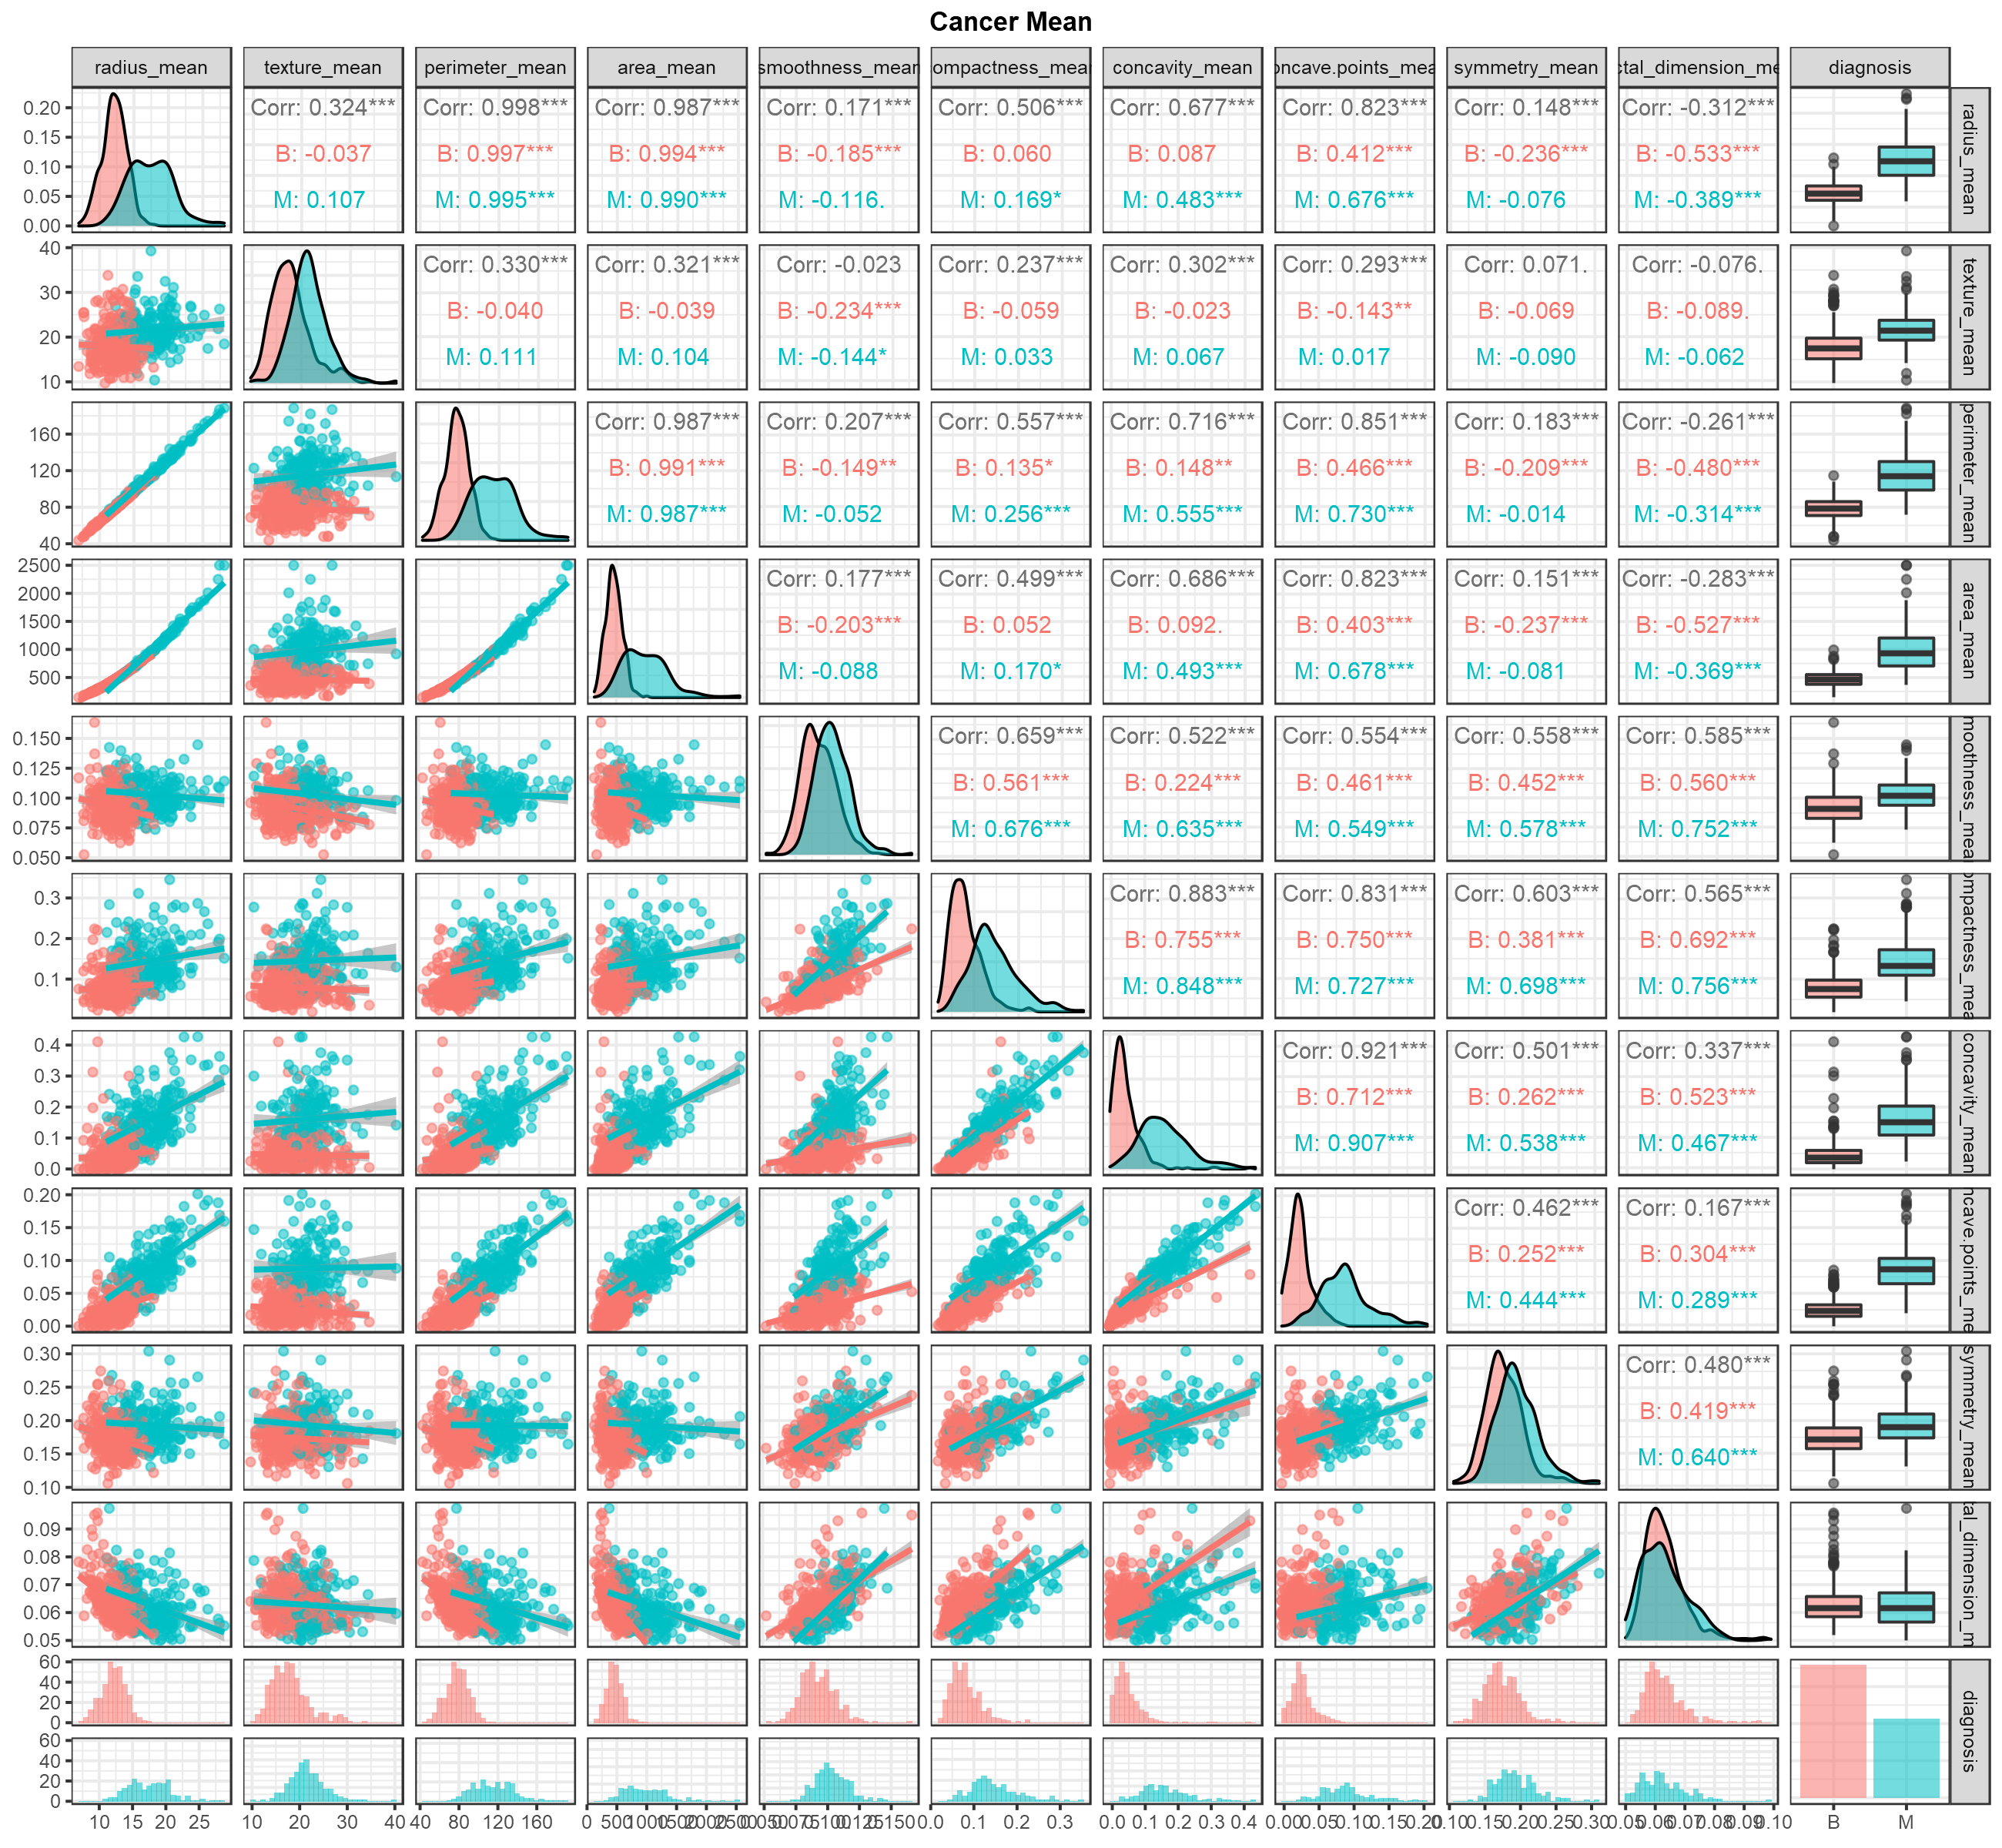

In [6]:
options(repr.plot.width=13, repr.plot.height=12,repr.plot.res = 200)
ggpairs(BC_df[,c(2:11,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+
labs(title="Cancer Mean")+theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

#### Cancer SE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



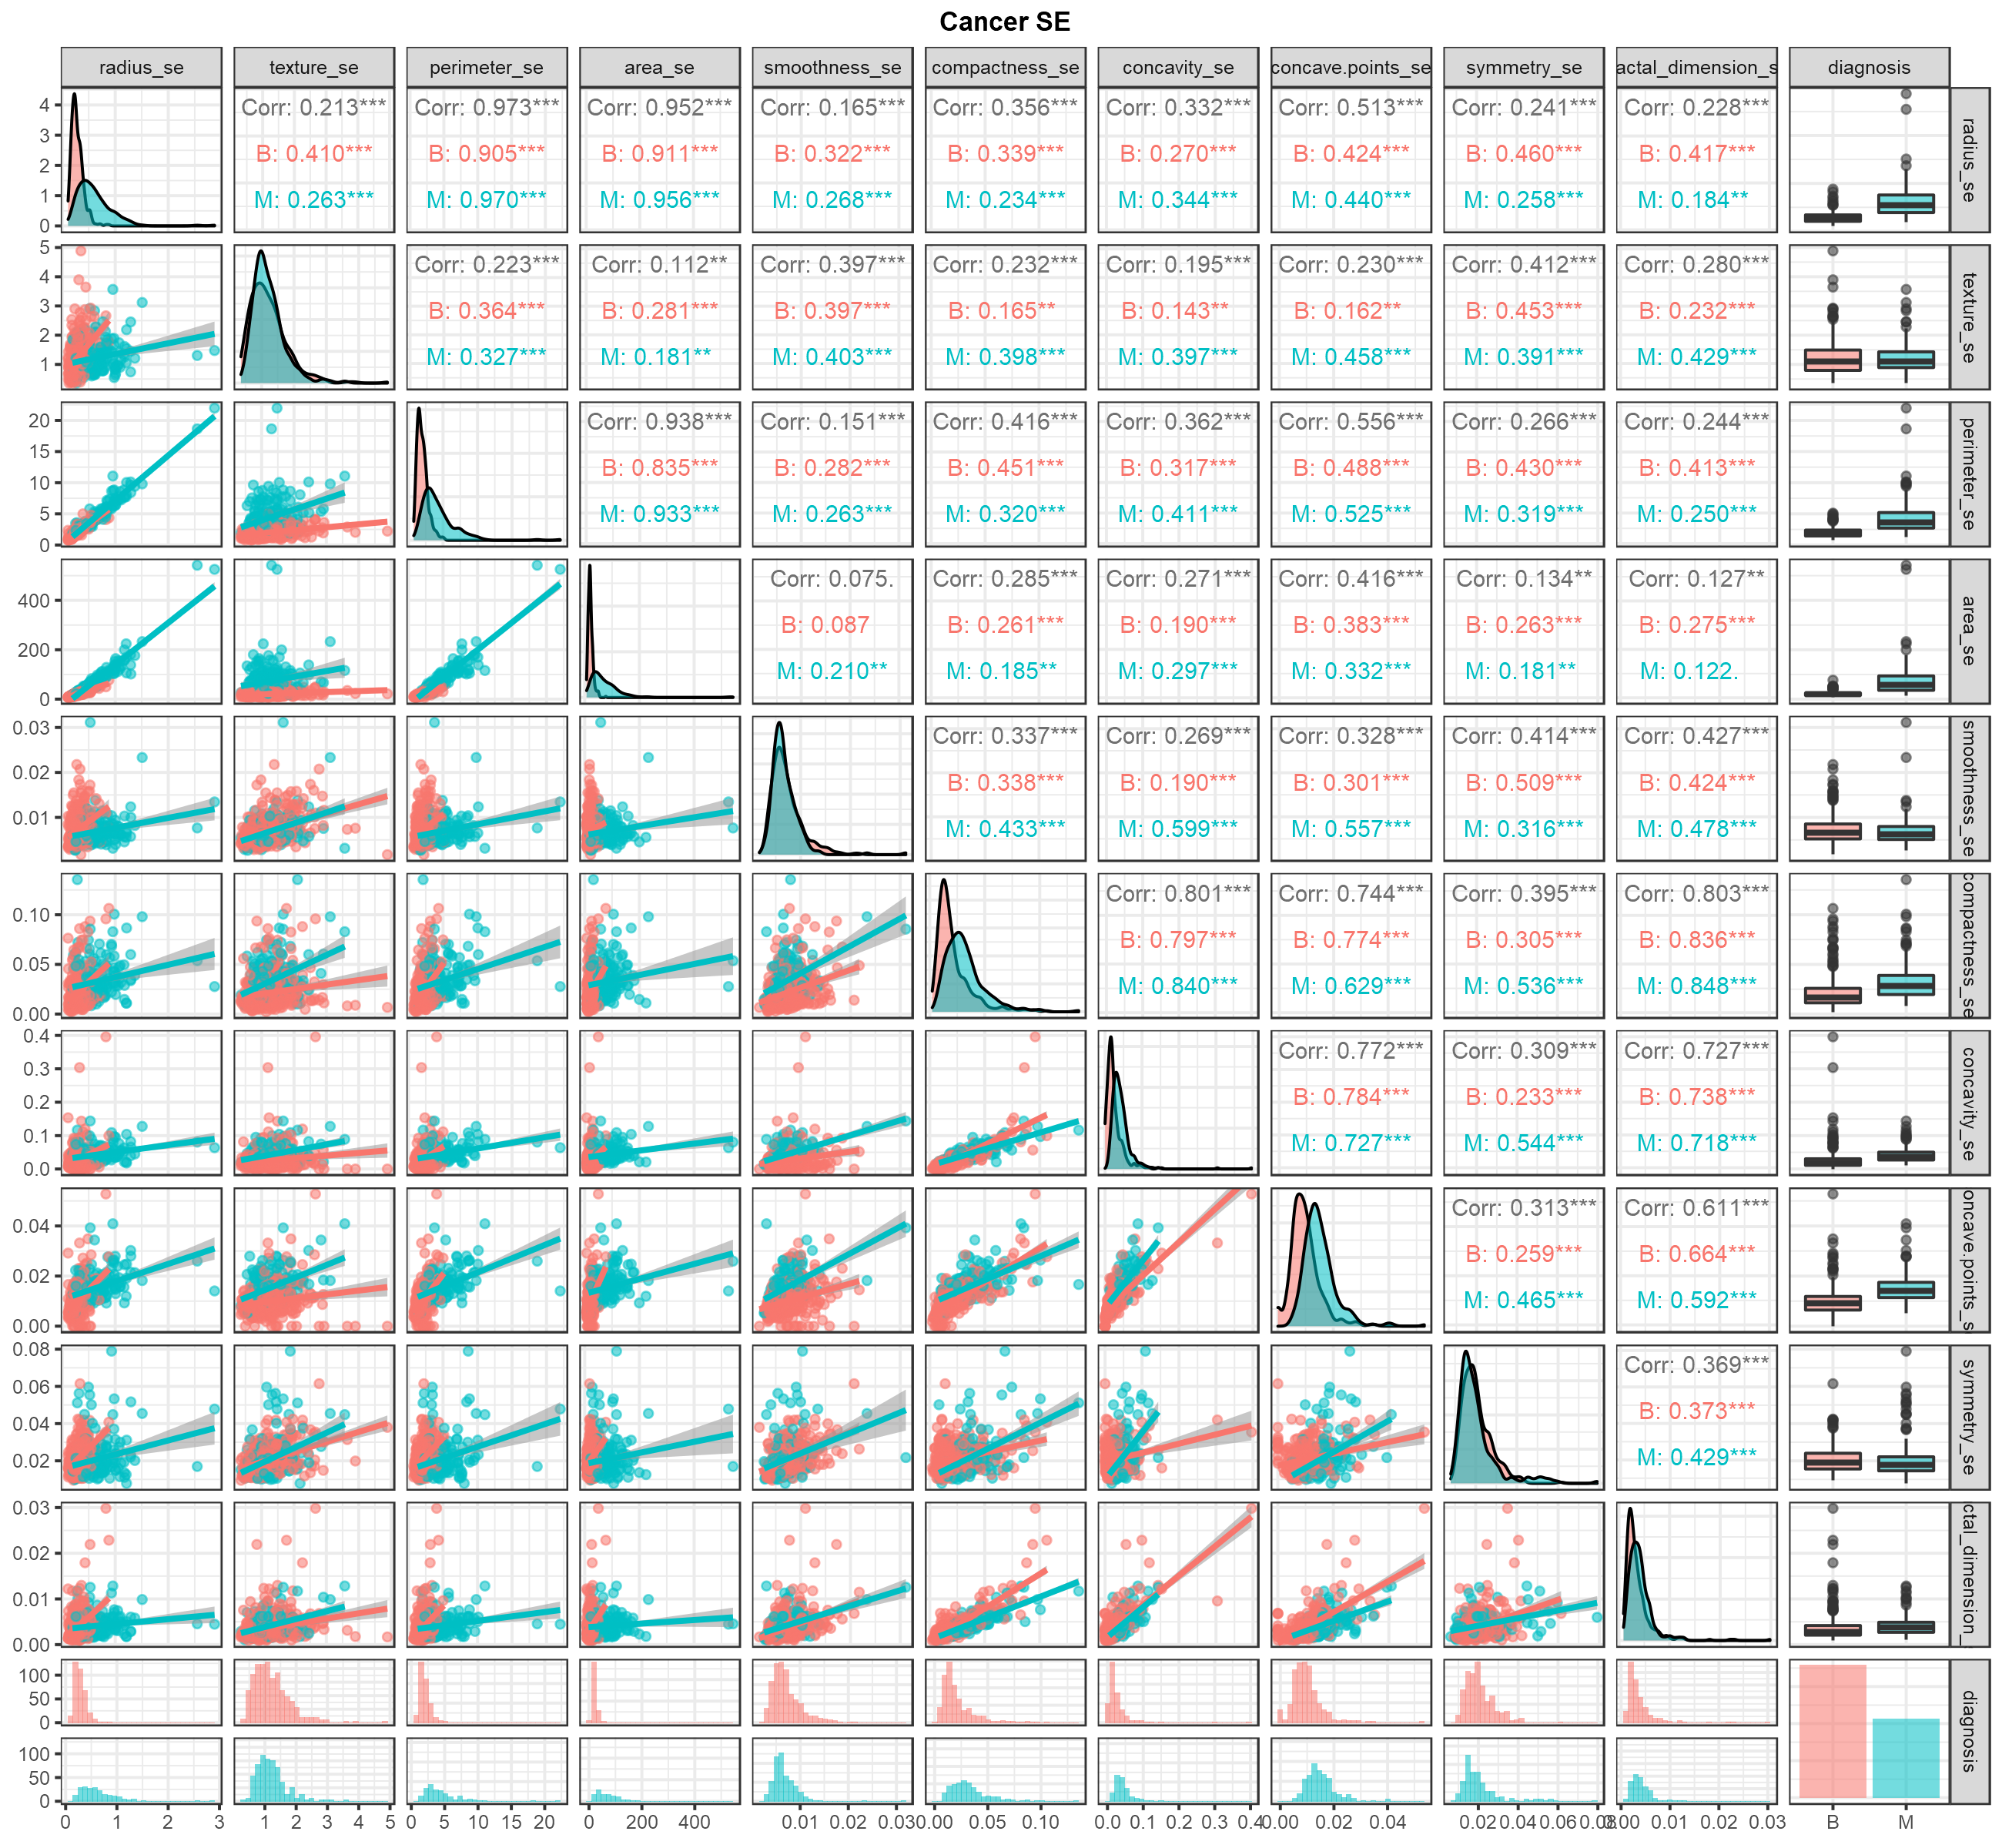

In [7]:
ggpairs(BC_df[,c(12:21,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+
labs(title="Cancer SE")+theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

#### Cancer Worst

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



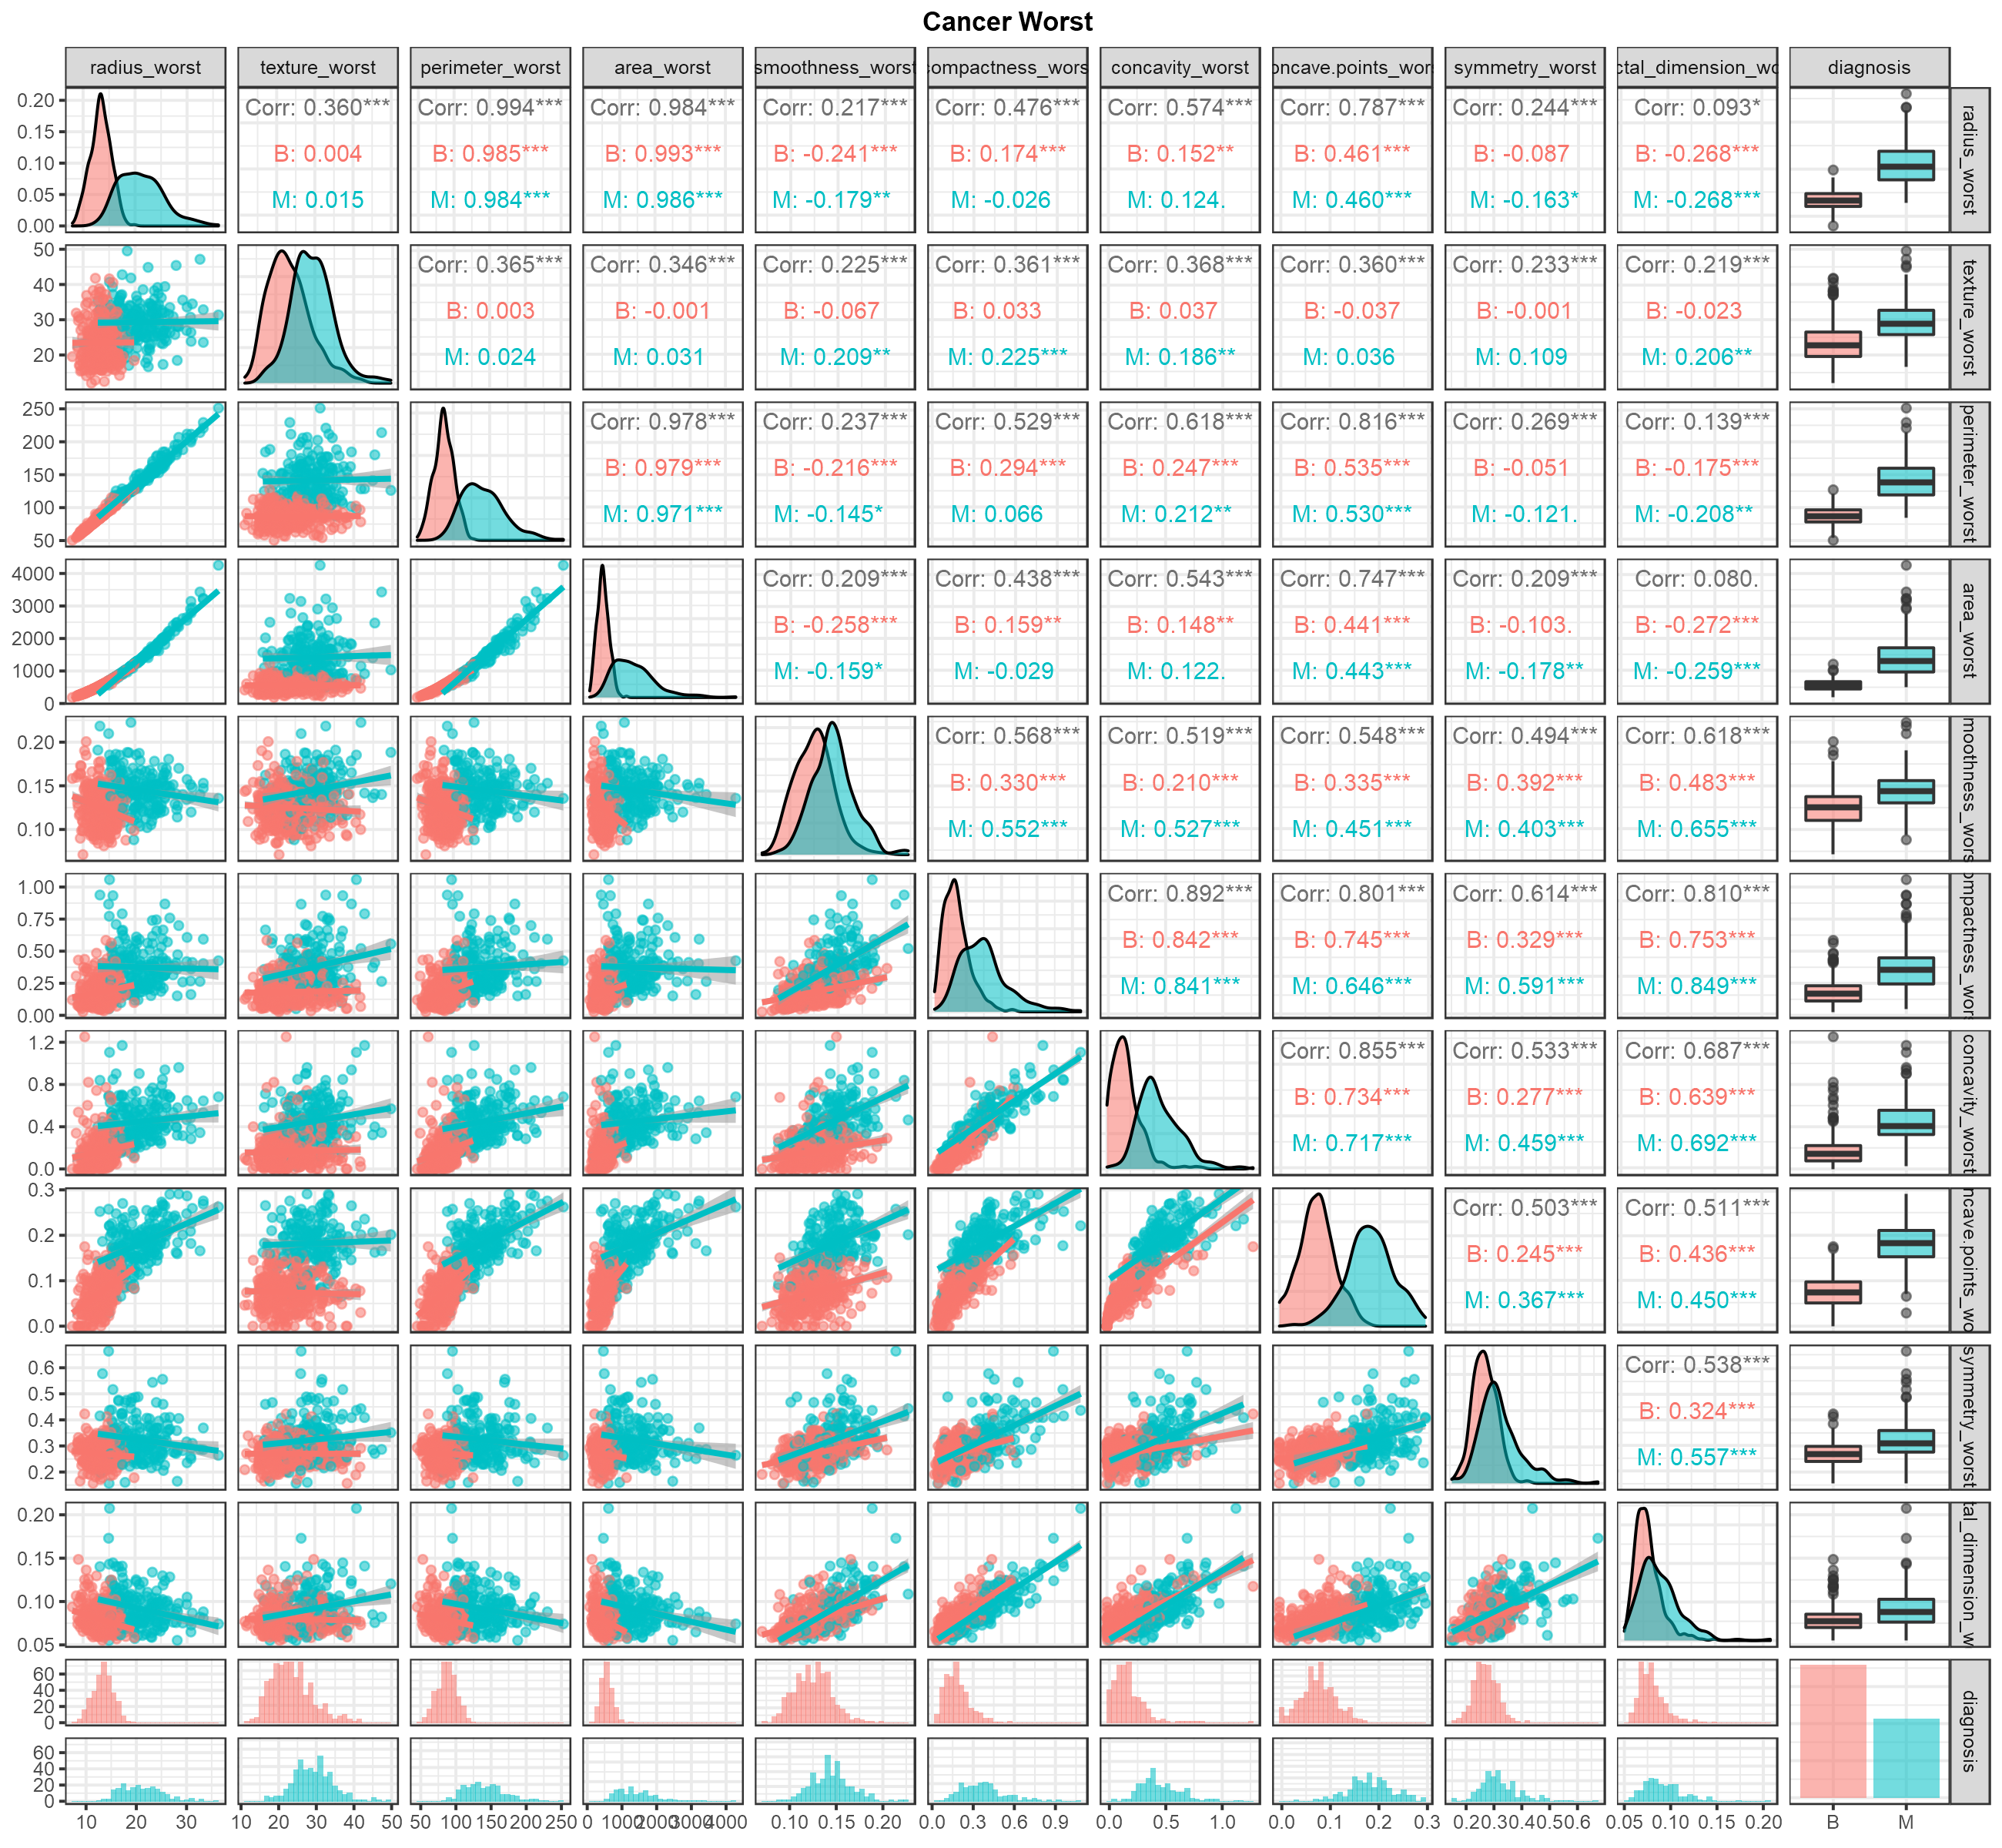

In [8]:
ggpairs(BC_df[,c(22:31,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+
labs(title="Cancer Worst")+theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

## **Principal Component Analysis**

Too many variables can cause several problems, such as:

- Increased computer throughput

- Too complex visualization problems

- Decrease efficiency by including variables that have no effect on the analysis

- Make data interpretation difficult

### Normalizing the data

In [9]:
# Normalization Transformation brings data to the 0 to 1 scale by substracting the minimum and dividing by the maximum of all observations.
BC_df_pca = normalize(BC_df)
BC_df_pca[sample(nrow(BC_df_pca), 5), ]

diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean
107 B         0.2205026   0.2915117    0.2168475      0.1141039 0.5558364      
214 M         0.4940603   0.5360162    0.4886324      0.3412513 0.4330595      
254 M         0.4883809   0.2492391    0.4782669      0.3328526 0.4348650      
96  M         0.6284727   0.4504565    0.6123281      0.4752916 0.3444073      
118 M         0.3733731   0.2353737    0.3790339      0.2286320 0.5738918      
    compactness_mean concavity_mean concave.points_mean symmetry_mean ...
107 0.2524998        0.1656514      0.1732107           0.3742424     ...
214 0.2920680        0.3940956      0.3278827           0.1252525     ...
254 0.2598614        0.2966261      0.4151590           0.3803030     ...
96  0.3432918        0.3432521      0.4315606           0.5227273     ...
118 0.4463530        0.3959700      0.4434891           0.5540404     ...
    radius_worst texture_worst perimeter_worst area_worst smoothness_worst
107 0.1853433    0.4594883     0.1748095       0.08270252 0.6447203       
214 0.3607257    0.4277719     0.3485731       0.20541683 0.3508552       
254 0.4240484    0.3483475     0.4008666       0.25481715 0.4650994       
96  0.5795091    0.5215885     0.5263708       0.38458514 0.3158555       
118 0.3870509    0.4091151     0.3819413       0.22360401 0.7701908       
    compactness_worst concavity_worst concave.points_worst symmetry_worst
107 0.2315976         0.2294728       0.4185567            0.244628425   
214 0.1474809         0.2238818       0.3776632            0.007490637   
254 0.2068574         0.2698083       0.6381443            0.310072935   
96  0.3168787         0.3273163       0.5405498            0.418687167   
118 0.4081749         0.3757188       0.6965636            0.398186477   
    fractal_dimension_worst
107 0.23566837             
214 0.08618654             
254 0.17112685             
96  0.18785255             
118 0.33753116

### Performing Principle Component Analysis (PCA)

Interpreting the Cumulative Proportion:
If Cumulative proportion of PC5 is 96.4%, then it means that the **sum of proportion of PC1~PC5 is 96.4!**

#### Cancer All

In [10]:
all_pca <- prcomp(BC_df_pca[,-1], scale = TRUE)
t(xtable(summary(all_pca)))

Standard deviation Proportion of Variance Cumulative Proportion
PC1  3.64439401         0.44272                0.44272              
PC2  2.38565601         0.18971                0.63243              
PC3  1.67867477         0.09393                0.72636              
PC4  1.40735229         0.06602                0.79239              
PC5  1.28402903         0.05496                0.84734              
PC6  1.09879780         0.04025                0.88759              
PC7  0.82171778         0.02251                0.91010              
PC8  0.69037464         0.01589                0.92598              
PC9  0.64567392         0.01390                0.93988              
PC10 0.59219377         0.01169                0.95157              
PC11 0.54213992         0.00980                0.96137              
PC12 0.51103950         0.00871                0.97007              
PC13 0.49128148         0.00805                0.97812              
PC14 0.39624453         0.00523                0.98335              
PC15 0.30681422         0.00314                0.98649              
PC16 0.28260007         0.00266                0.98915              
PC17 0.24371918         0.00198                0.99113              
PC18 0.22938785         0.00175                0.99288              
PC19 0.22243559         0.00165                0.99453              
PC20 0.17652026         0.00104                0.99557              
PC21 0.17312681         0.00100                0.99657              
PC22 0.16564843         0.00091                0.99749              
PC23 0.15601550         0.00081                0.99830              
PC24 0.13436892         0.00060                0.99890              
PC25 0.12442376         0.00052                0.99942              
PC26 0.09043030         0.00027                0.99969              
PC27 0.08306903         0.00023                0.99992              
PC28 0.03986650         0.00005                0.99997              
PC29 0.02736427         0.00002                1.00000              
PC30 0.01153451         0.00000                1.00000

#### Cancer Mean

In [11]:
mean_pca <- prcomp(BC_df_pca[,c(2:11)], scale = TRUE)
t(xtable(summary(mean_pca)))

Standard deviation Proportion of Variance Cumulative Proportion
PC1  2.34063837         0.54786                0.54786              
PC2  1.58704555         0.25187                0.79973              
PC3  0.93841099         0.08806                0.88779              
PC4  0.70640600         0.04990                0.93769              
PC5  0.61035989         0.03725                0.97495              
PC6  0.35233755         0.01241                0.98736              
PC7  0.28299348         0.00801                0.99537              
PC8  0.18678810         0.00349                0.99886              
PC9  0.10552469         0.00111                0.99997              
PC10 0.01680196         0.00003                1.00000

#### Cancer SE

In [12]:
se_pca <- prcomp(BC_df_pca[,c(12:21)], scale = TRUE)
t(xtable(summary(se_pca)))

Standard deviation Proportion of Variance Cumulative Proportion
PC1  2.1779279          0.47434                0.47434              
PC2  1.4405579          0.20752                0.68186              
PC3  1.1244649          0.12644                0.80830              
PC4  0.7709473          0.05944                0.86774              
PC5  0.7599129          0.05775                0.92548              
PC6  0.5793947          0.03357                0.95905              
PC7  0.4351151          0.01893                0.97798              
PC8  0.3961933          0.01570                0.99368              
PC9  0.2043629          0.00418                0.99786              
PC10 0.1463479          0.00214                1.00000

#### Cancer Worst

In [13]:
worst_pca <- prcomp(BC_df_pca[,c(22:31)], scale = TRUE)
t(xtable(summary(worst_pca)))

Standard deviation Proportion of Variance Cumulative Proportion
PC1  2.38688848         0.56972                0.56972              
PC2  1.44429302         0.20860                0.77832              
PC3  0.89597293         0.08028                0.85860              
PC4  0.73531379         0.05407                0.91267              
PC5  0.71740732         0.05147                0.96413              
PC6  0.42862478         0.01837                0.98251              
PC7  0.28959132         0.00839                0.99089              
PC8  0.26801978         0.00718                0.99808              
PC9  0.12342831         0.00152                0.99960              
PC10 0.06326496         0.00040                1.00000

### Screeplot

A scree plot, on the other hand, is a diagnostic tool to check whether PCA works well on your data or not. Principal components are created in order of the amount of variation they cover: PC1 captures the most variation, PC2 — the second most, and so on. Each of them contributes some information of the data, and in a PCA, there are as many principal components as there are characteristics. Threshold Cumulative proportion is 85% for this dataset.

#### Cancer All

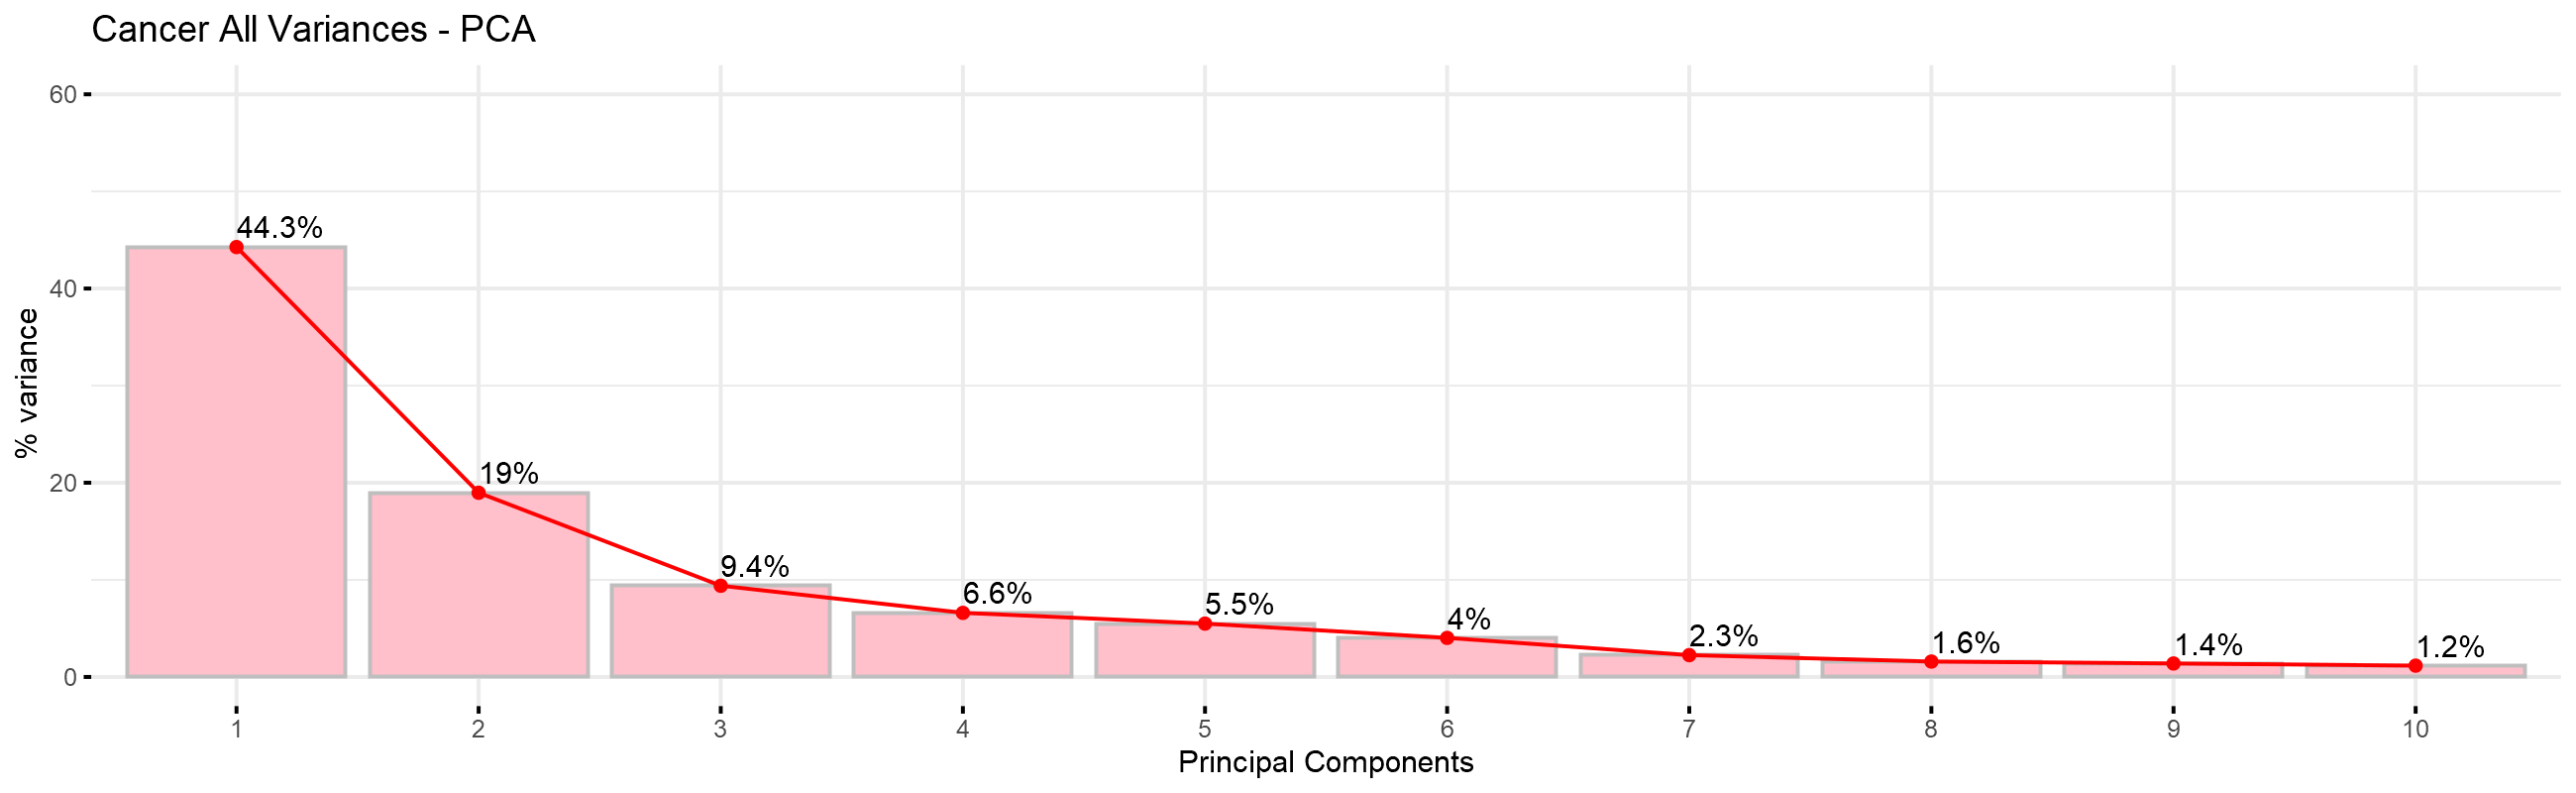

In [14]:
options(repr.plot.width=13, repr.plot.height=4,repr.plot.res = 200)
fviz_eig(all_pca, addlabels=TRUE, ylim=c(0,60), geom = c("bar", "line"), barfill = "pink", barcolor="grey",linecolor = "red", ncp=10)+
labs(title = "Cancer All Variances - PCA",
         x = "Principal Components", y = "% variance")

Optimal PC value = PC1 ~ PC6 = 88.8% > 85%

#### Cancer Mean 

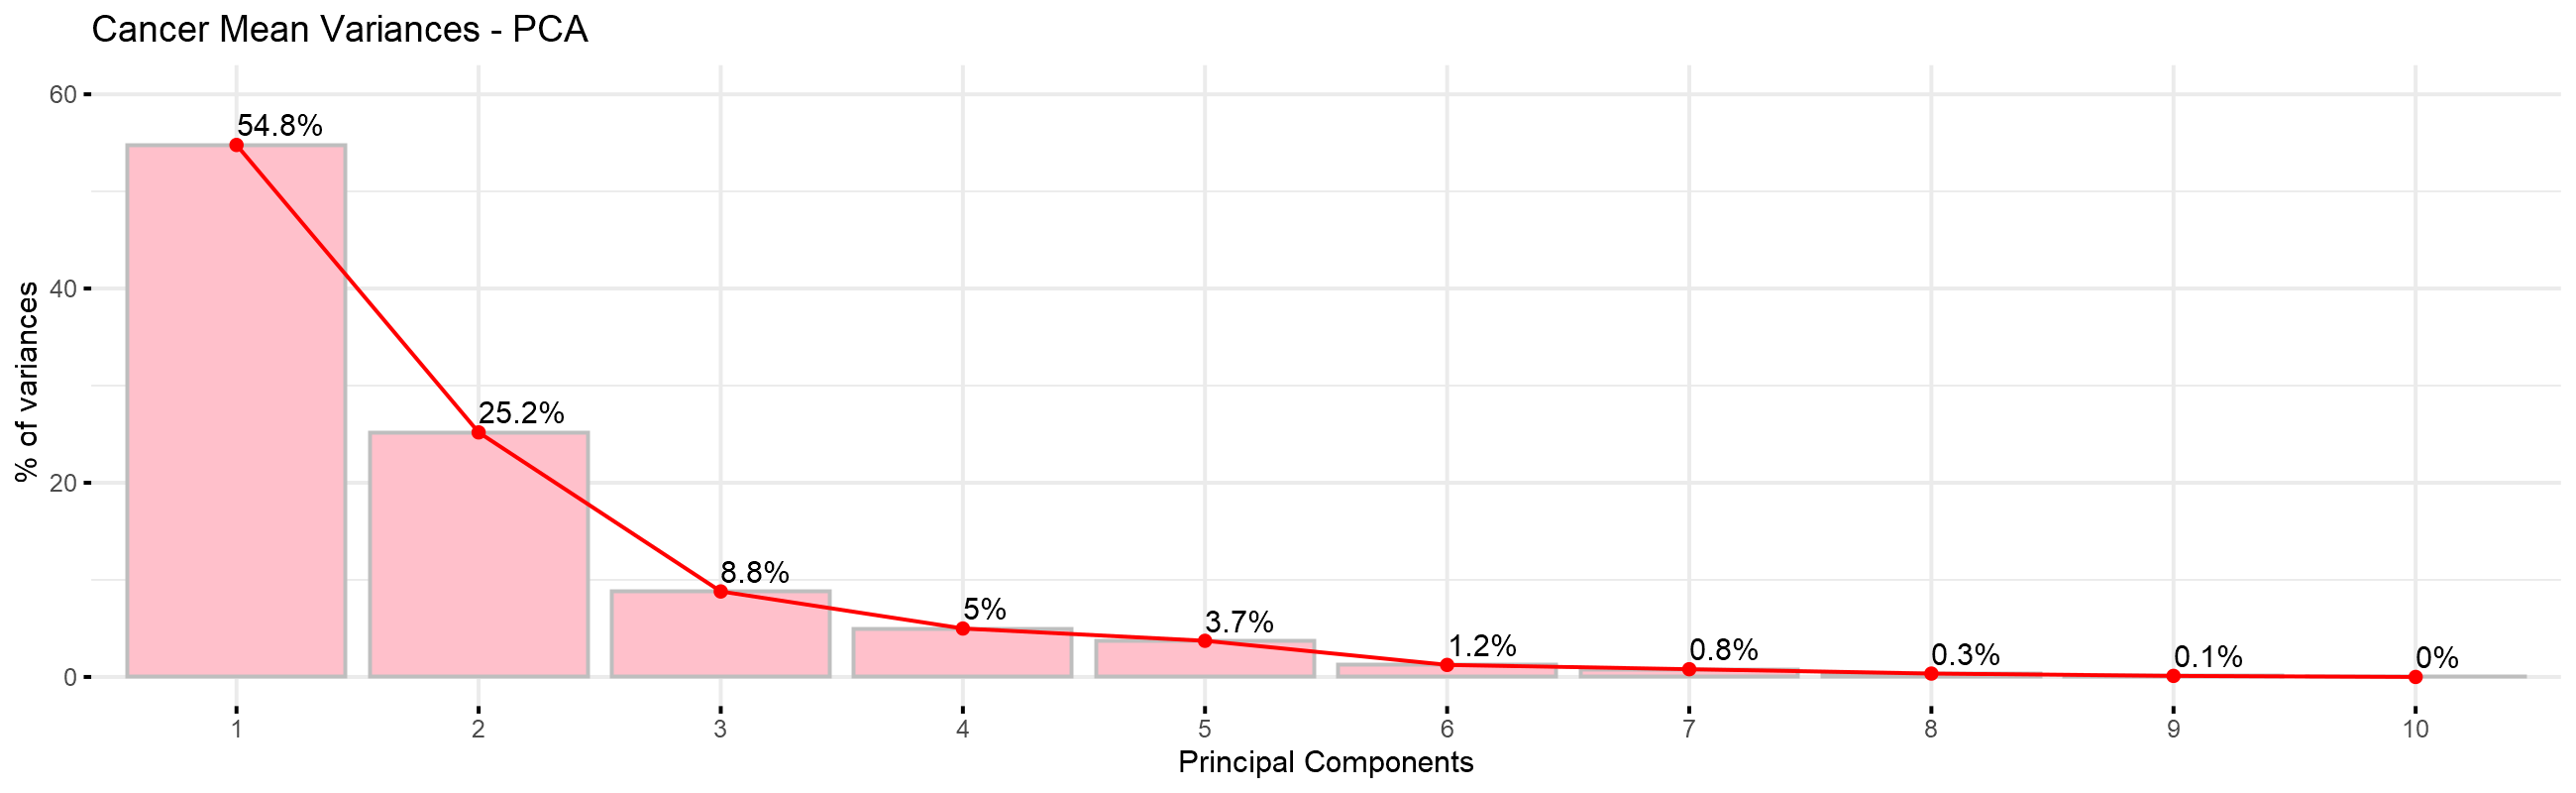

In [15]:
fviz_eig(mean_pca, addlabels=TRUE, ylim=c(0,60), geom = c("bar", "line"), barfill = "pink", barcolor="grey",linecolor = "red", ncp=10)+
labs(title = "Cancer Mean Variances - PCA",
         x = "Principal Components", y = "% of variances")

Optimal PC value = PC1 ~ PC3 = 88.8% > 85%

#### Cancer SE

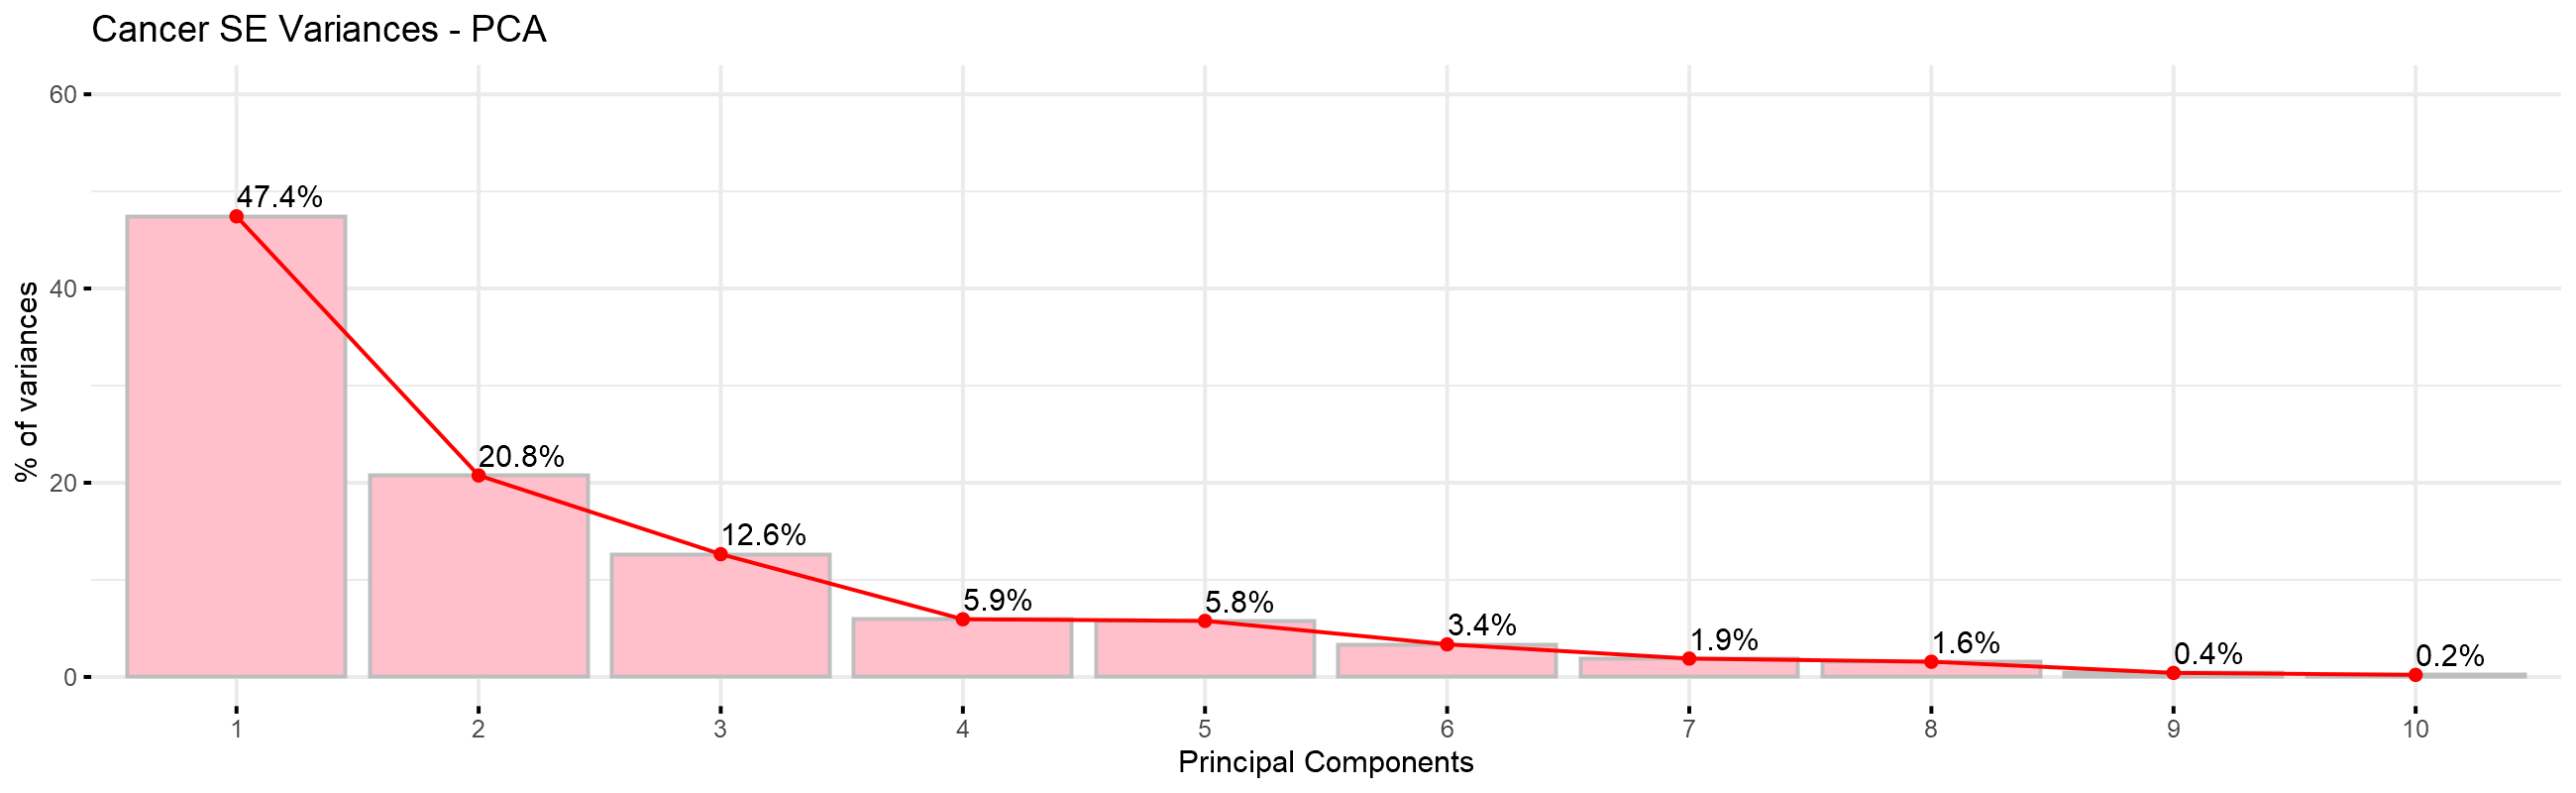

In [16]:
fviz_eig(se_pca, addlabels=TRUE, ylim=c(0,60), geom = c("bar", "line"), barfill = "pink", barcolor="grey",linecolor = "red", ncp=10)+
labs(title = "Cancer SE Variances - PCA",
         x = "Principal Components", y = "% of variances")

Optimal PC value = PC1 ~ PC4 = 86.7% > 85%

#### Cancer Worst

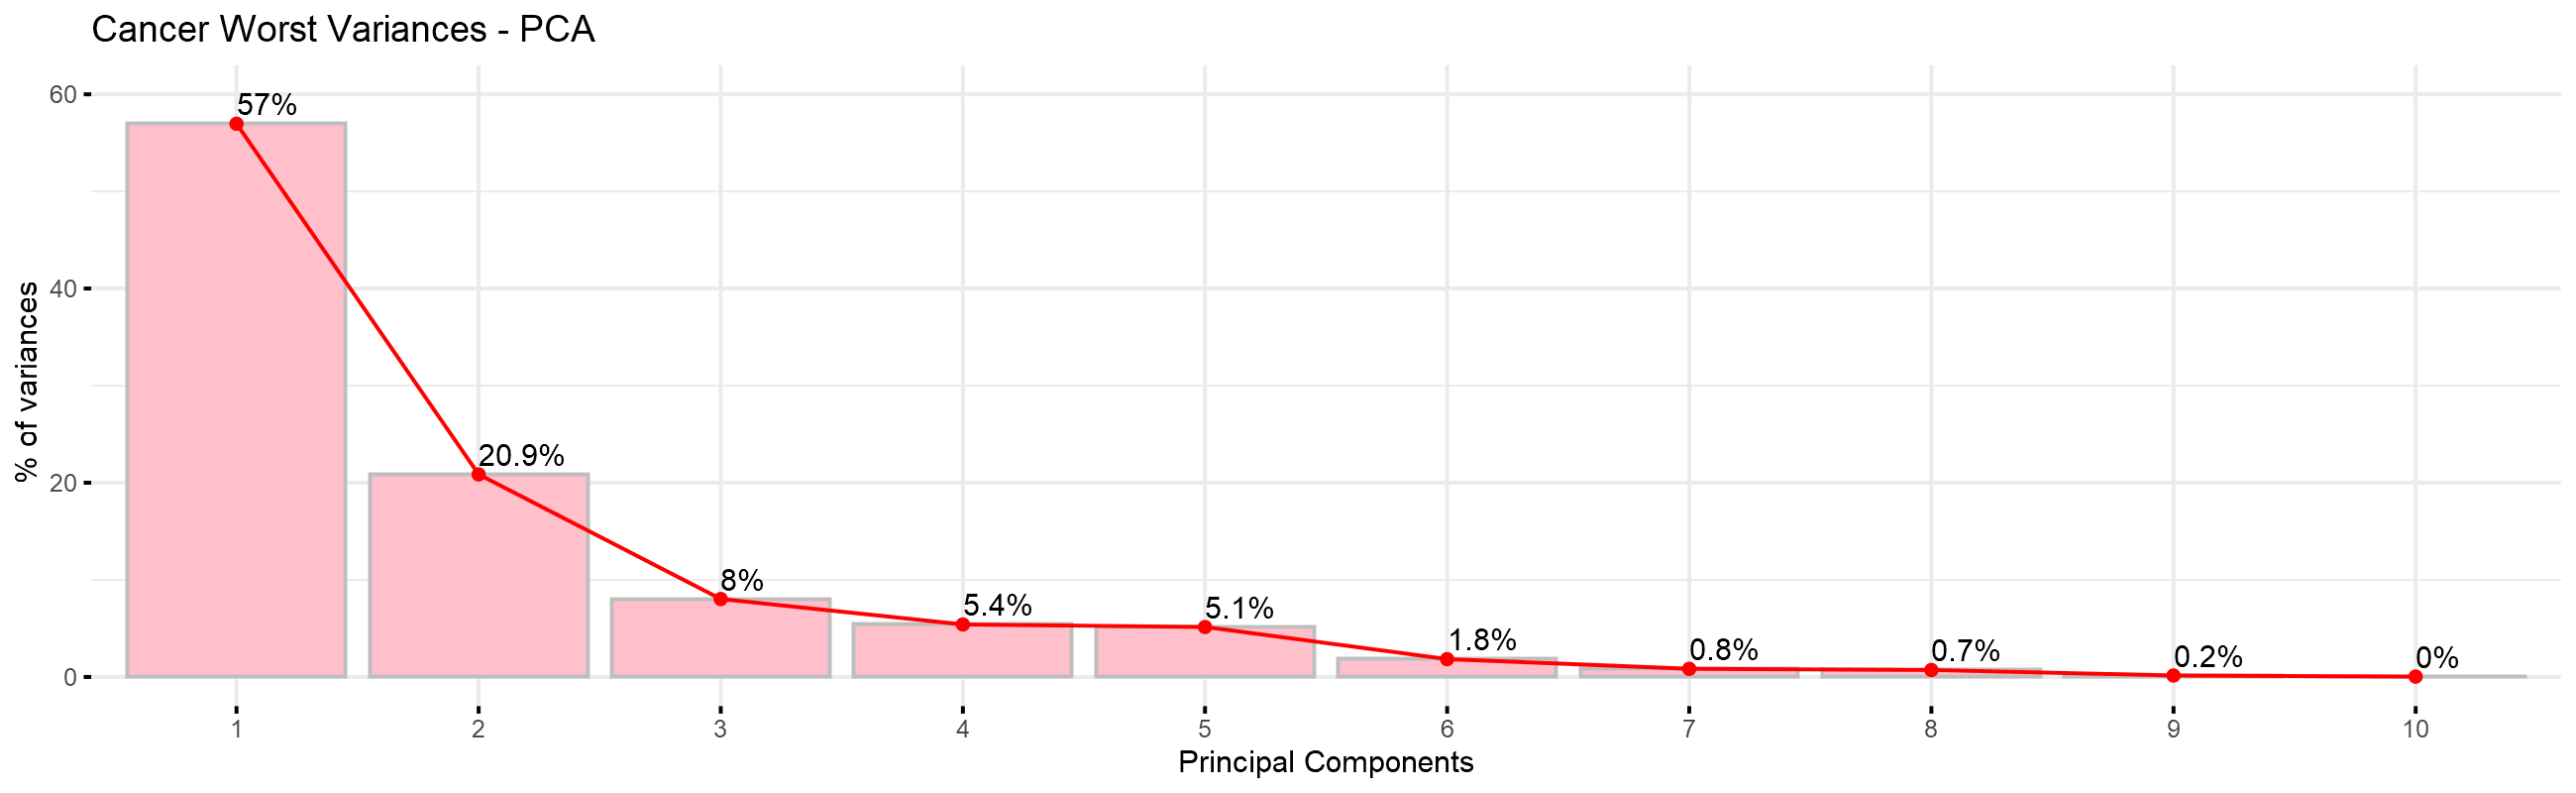

In [17]:
fviz_eig(worst_pca, addlabels=TRUE, ylim=c(0,60), geom = c("bar", "line"), barfill = "pink", barcolor="grey",linecolor = "red", ncp=10)+
labs(title = "Cancer Worst Variances - PCA",
         x = "Principal Components", y = "% of variances")

Optimal PC value = PC1 ~ PC3 = 85.9% > 85%

### Contributions of variables to PC1 & PC2

#### Cancer All

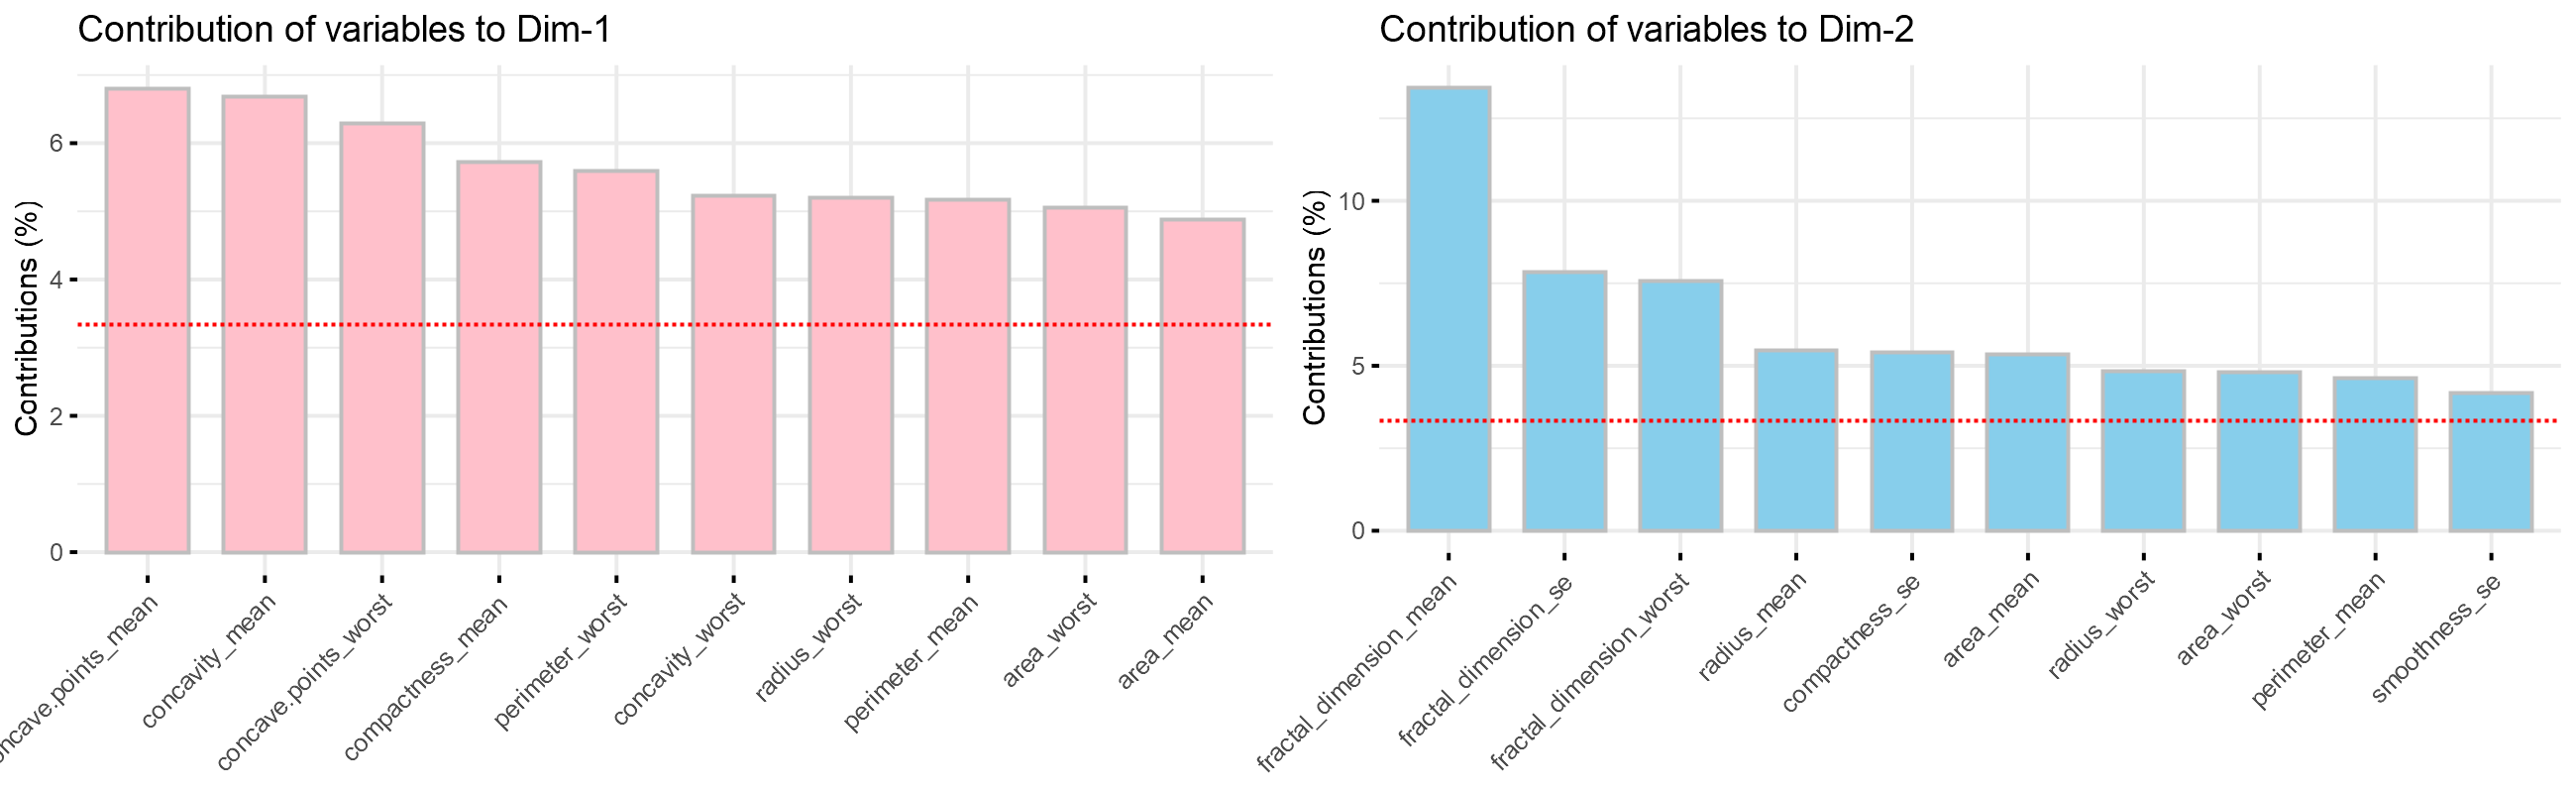

In [18]:
p1 <- fviz_contrib(all_pca, choice="var", axes=1, fill="pink", color="grey", top=10)
p2 <- fviz_contrib(all_pca, choice="var", axes=2, fill="skyblue", color="grey", top=10)
grid.arrange(p1,p2,ncol=2)

Dimension 1 ~ concave.points_mean

Dimension 2 ~ fractal_dimension_mean

#### Cancer Mean

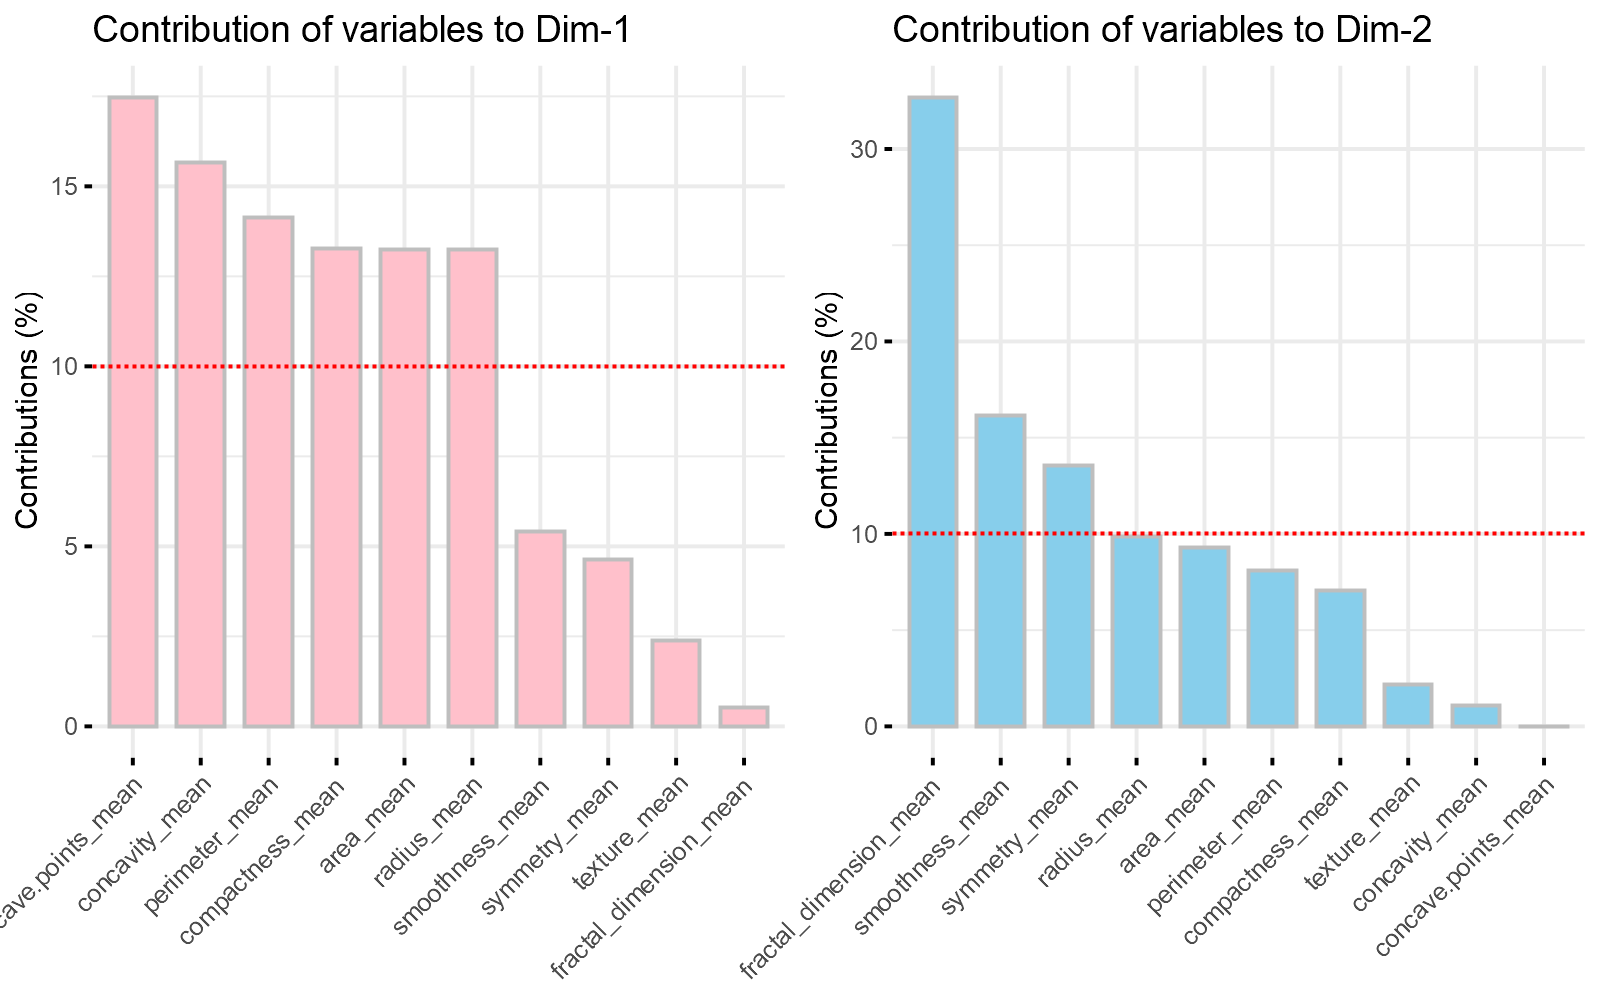

In [62]:
p1 <- fviz_contrib(mean_pca, choice="var", axes=1, fill="pink", color="grey", top=10)
p2 <- fviz_contrib(mean_pca, choice="var", axes=2, fill="skyblue", color="grey", top=10)
grid.arrange(p1,p2,ncol=2)

Dimension 1 ~ concave.points_mean

Dimension 2 ~ fractal_dimension_mean

#### Cancer SE

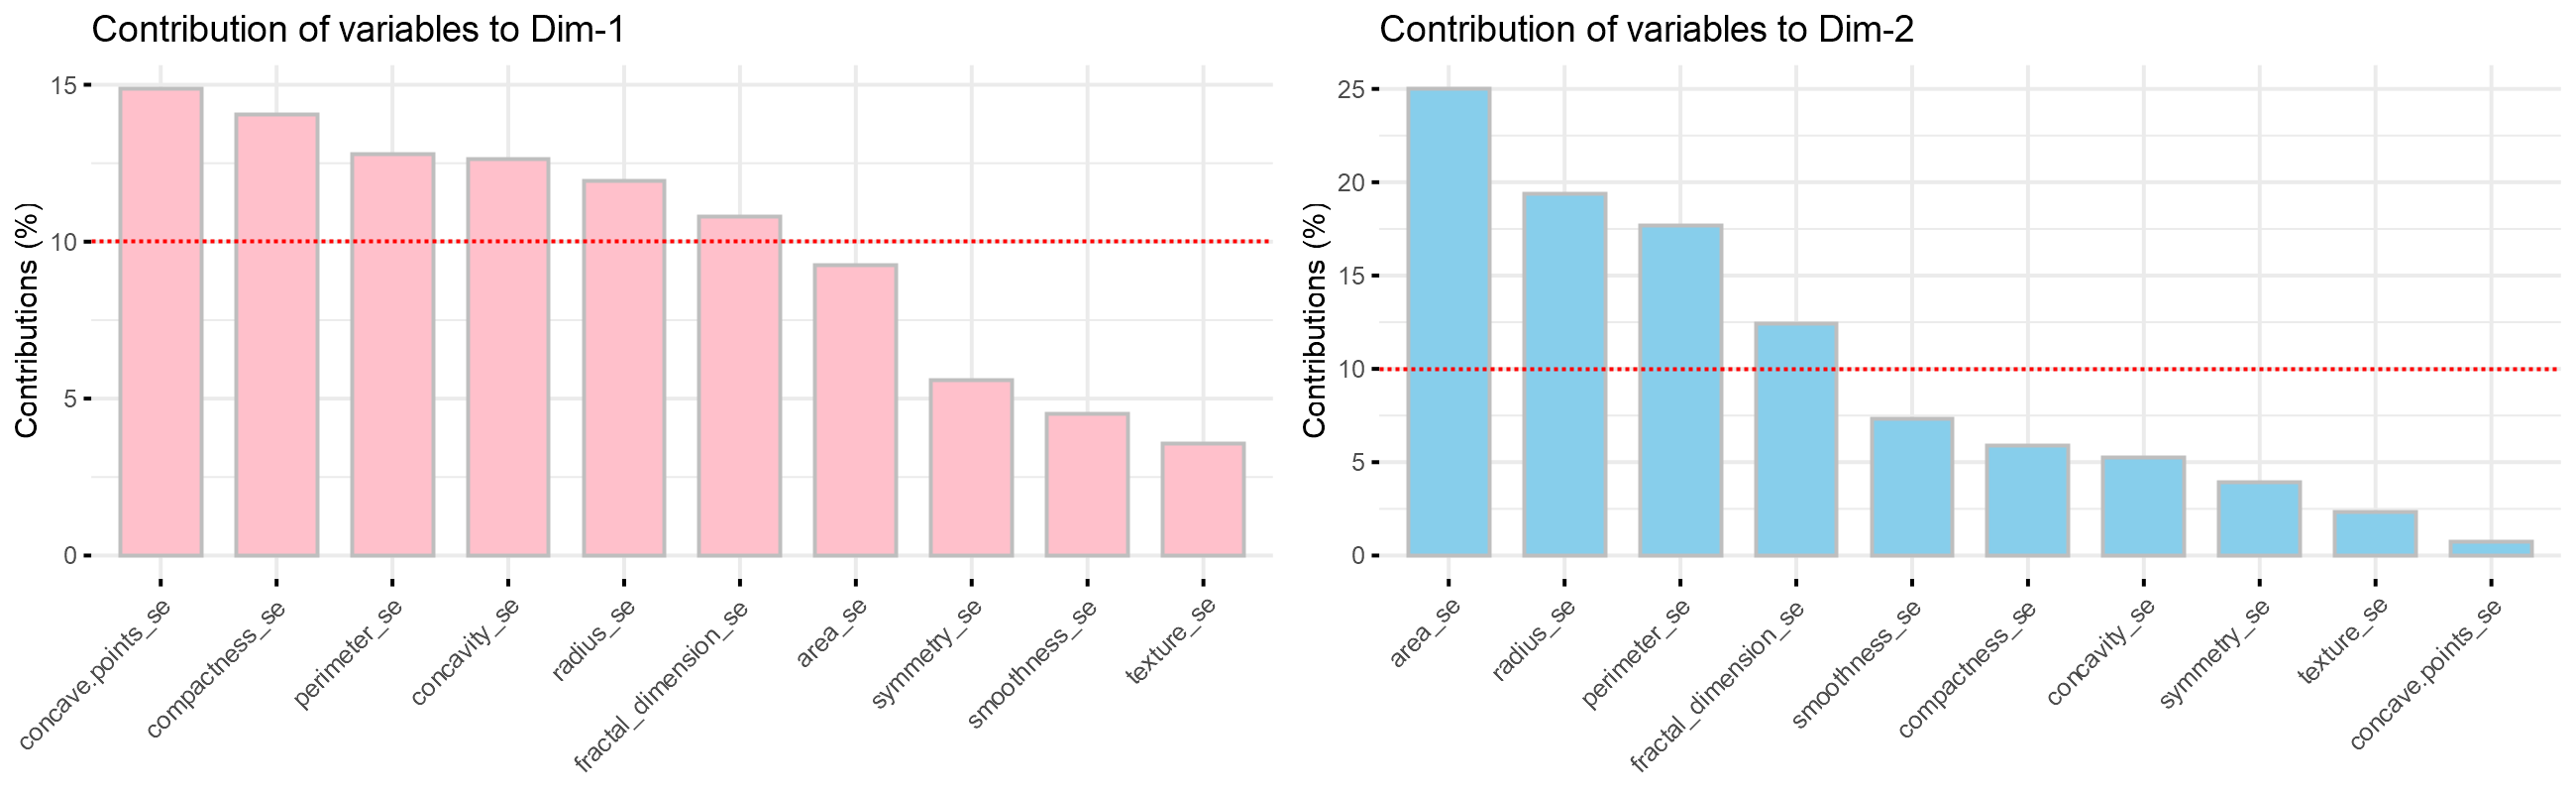

In [20]:
p1 <- fviz_contrib(se_pca, choice="var", axes=1, fill="pink", color="grey", top=10)
p2 <- fviz_contrib(se_pca, choice="var", axes=2, fill="skyblue", color="grey", top=10)
grid.arrange(p1,p2,ncol=2)

Dimension 1 ~ concave.points_se

Dimension 2 ~ area_se

#### Cancer Worst

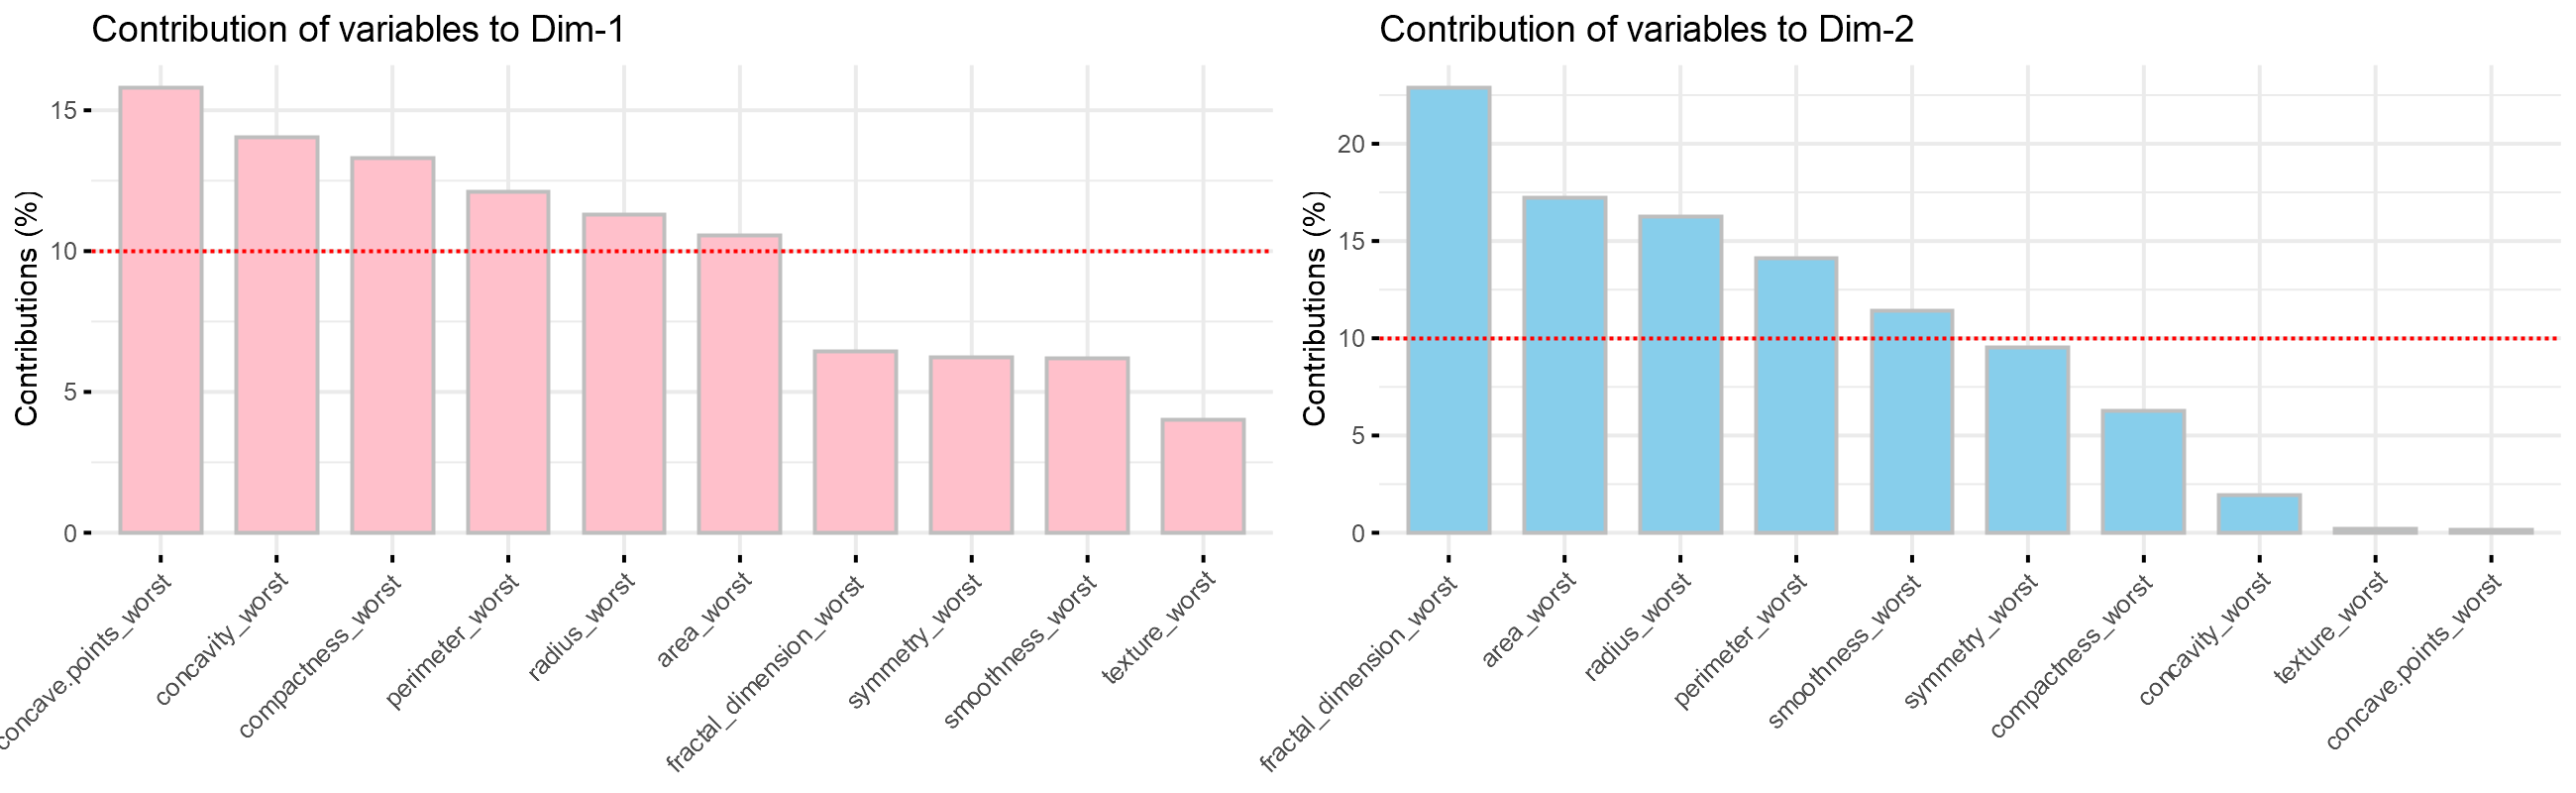

In [21]:
p1 <- fviz_contrib(worst_pca, choice="var", axes=1, fill="pink", color="grey", top=10)
p2 <- fviz_contrib(worst_pca, choice="var", axes=2, fill="skyblue", color="grey", top=10)
grid.arrange(p1,p2,ncol=2)

Dimension 1 ~ concave.points_worst

Dimension 2 ~ fractal_dimension_worst

### Bi Plot

#### Cancer Mean

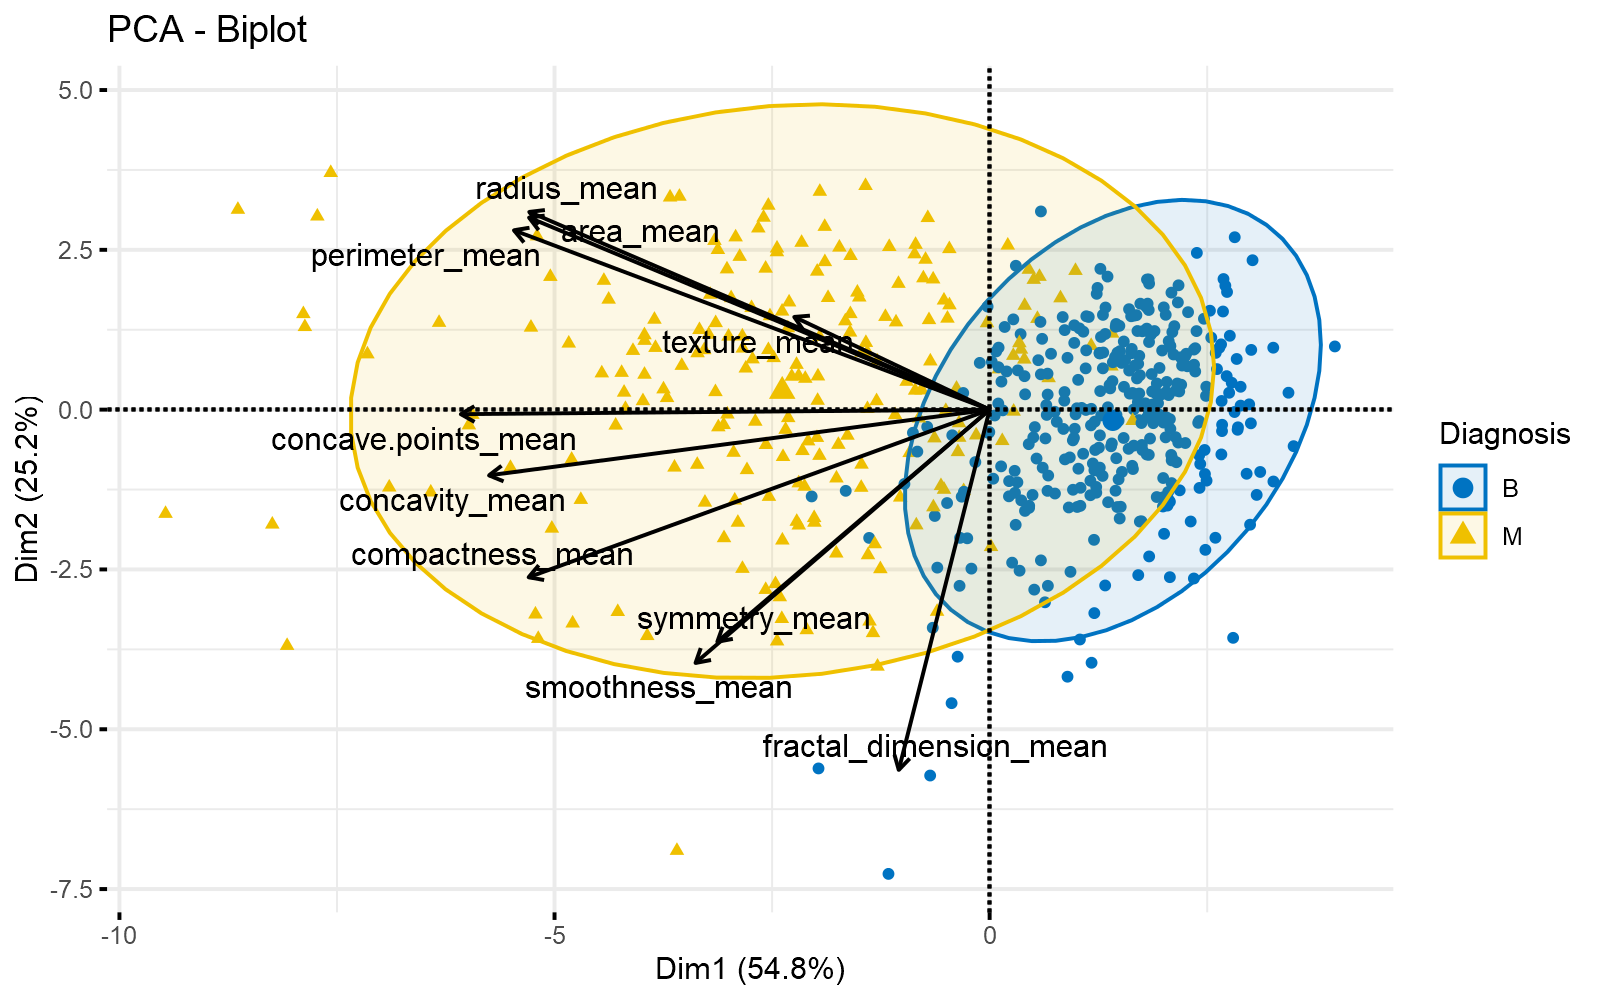

In [55]:
options(repr.plot.width=8, repr.plot.height=5,repr.plot.res = 200)
fviz_pca_biplot(mean_pca, col.ind = BC_df_pca[,c(1:11)]$diagnosis, col="black",
                palette = "jco", geom = "point", repel=TRUE,
                legend.title="Diagnosis", addEllipses = TRUE)

#### Cancer SE

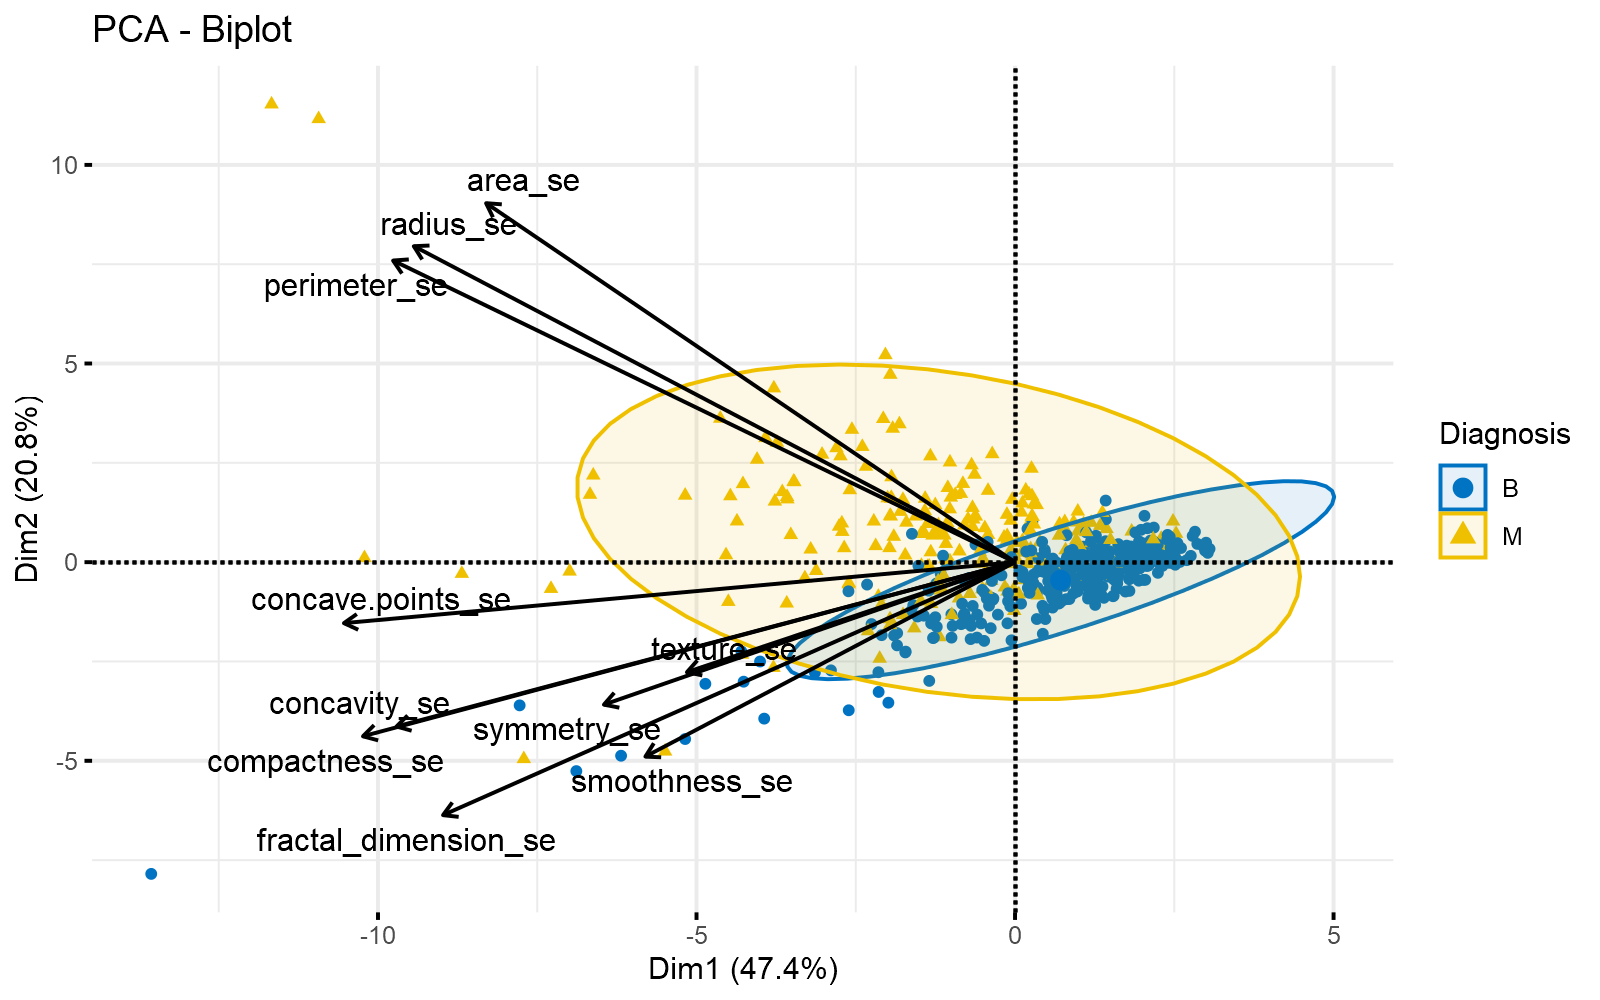

In [57]:
fviz_pca_biplot(se_pca, col.ind = BC_df_pca[,c(12:21,1)]$diagnosis, col="black",
                palette = "jco", geom = "point", repel=TRUE,
                legend.title="Diagnosis", addEllipses = TRUE)

#### Cancer Worst

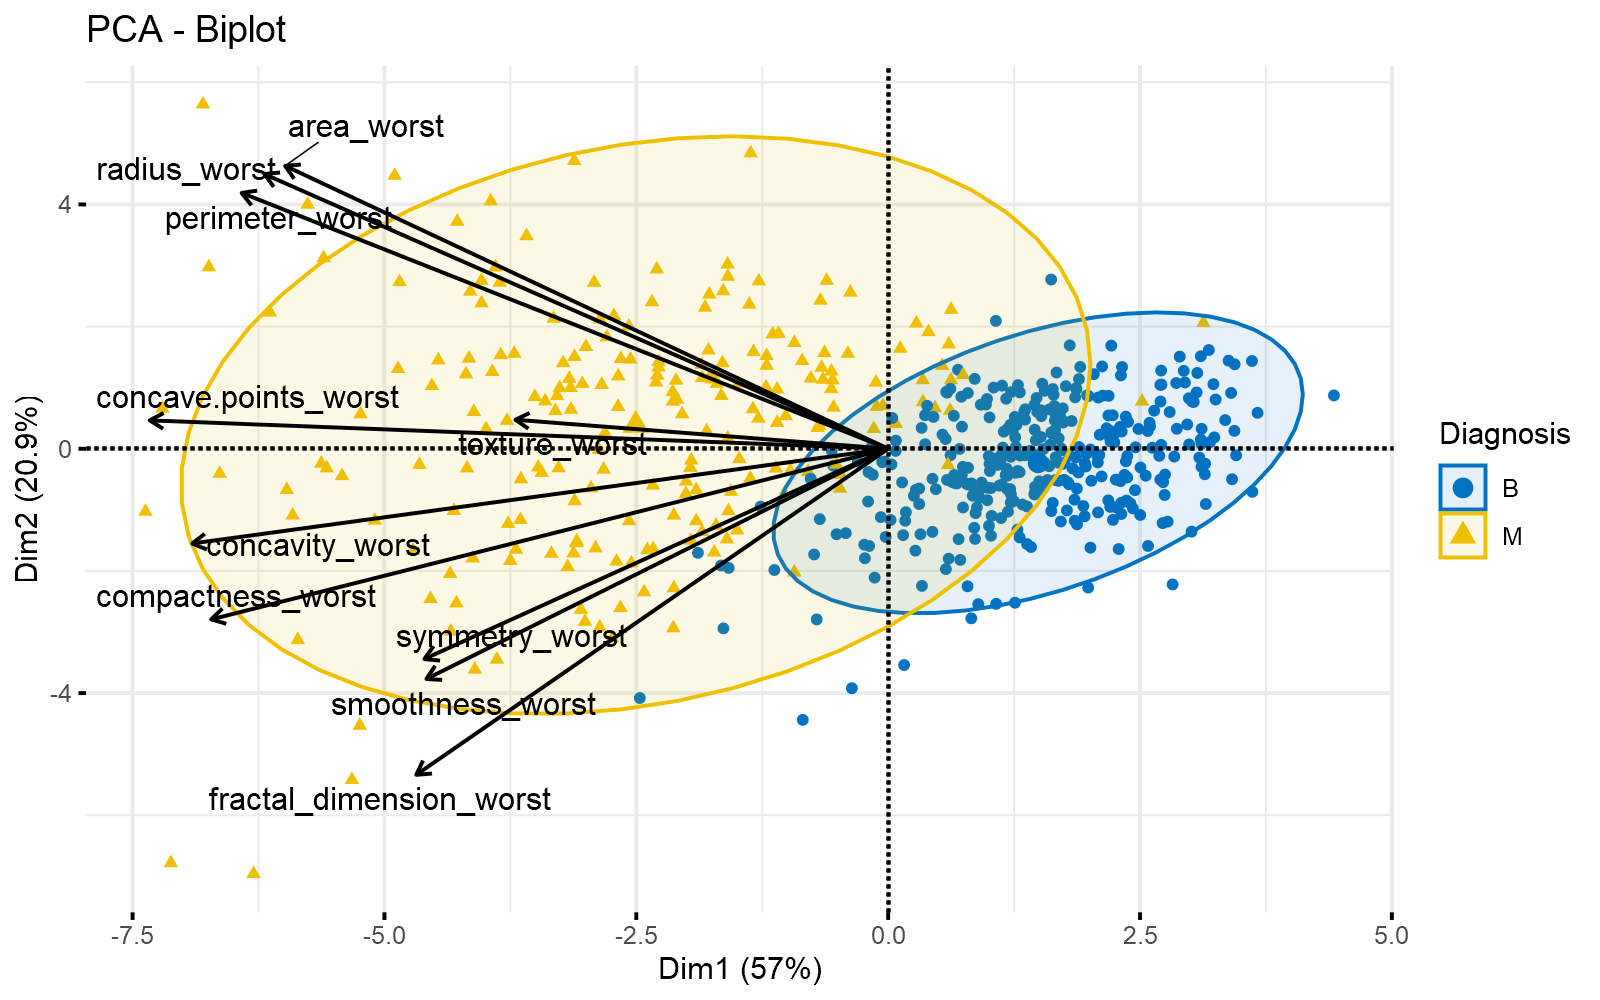

In [59]:
fviz_pca_biplot(worst_pca, col.ind = BC_df_pca[,c(22:30,1)]$diagnosis, col="black",
                palette = "jco", geom = "point", repel=TRUE,
                legend.title="Diagnosis", addEllipses = TRUE)

## **Machine Learning Classification**

### Train Test Split

In [22]:
#Splitting the data in train & test
set.seed(123)
split = sample.split(BC_df, SplitRatio = 0.75)
train = subset(BC_df, split=="TRUE")
test = subset(BC_df, split=="FALSE")

### Model Development

In [23]:
# prepare training subset
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)

# CART
set.seed(7)
fit.cart <- train(diagnosis~., data=train, method="rpart",trControl=trainControl)

# SVM
fit.svm <- train(diagnosis~., data=train, method="svmRadial",trControl=trainControl)

# KNN
fit.knn <- train(diagnosis~., data=train, method="knn", trControl=trainControl)

# Random Forest
fit.rf <- train(diagnosis~., data=train, method="rf", trControl=trainControl)

# collect resamples
results <- resamples(list(CART=fit.cart, SVM=fit.svm, KNN=fit.knn, RF=fit.rf))

### Model Evaluation

In [24]:
summary(results)


Call:
summary.resamples(object = results)

Models: CART, SVM, KNN, RF 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
CART 0.8571429 0.9069767 0.9302326 0.9304729 0.9523810 0.9767442    0
SVM  0.9069767 0.9526578 0.9761905 0.9738365 1.0000000 1.0000000    0
KNN  0.8292683 0.8889812 0.9285714 0.9295298 0.9760453 1.0000000    0
RF   0.8809524 0.9512195 0.9756098 0.9613042 0.9767442 1.0000000    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
CART 0.6978417 0.8034202 0.8555431 0.8539288 0.9026038 0.951049    0
SVM  0.8054299 0.9027868 0.9504880 0.9453838 1.0000000 1.000000    0
KNN  0.6287193 0.7690692 0.8500145 0.8500103 0.9492164 1.000000    0
RF   0.7407407 0.8975000 0.9481669 0.9183964 0.9510010 1.000000    0


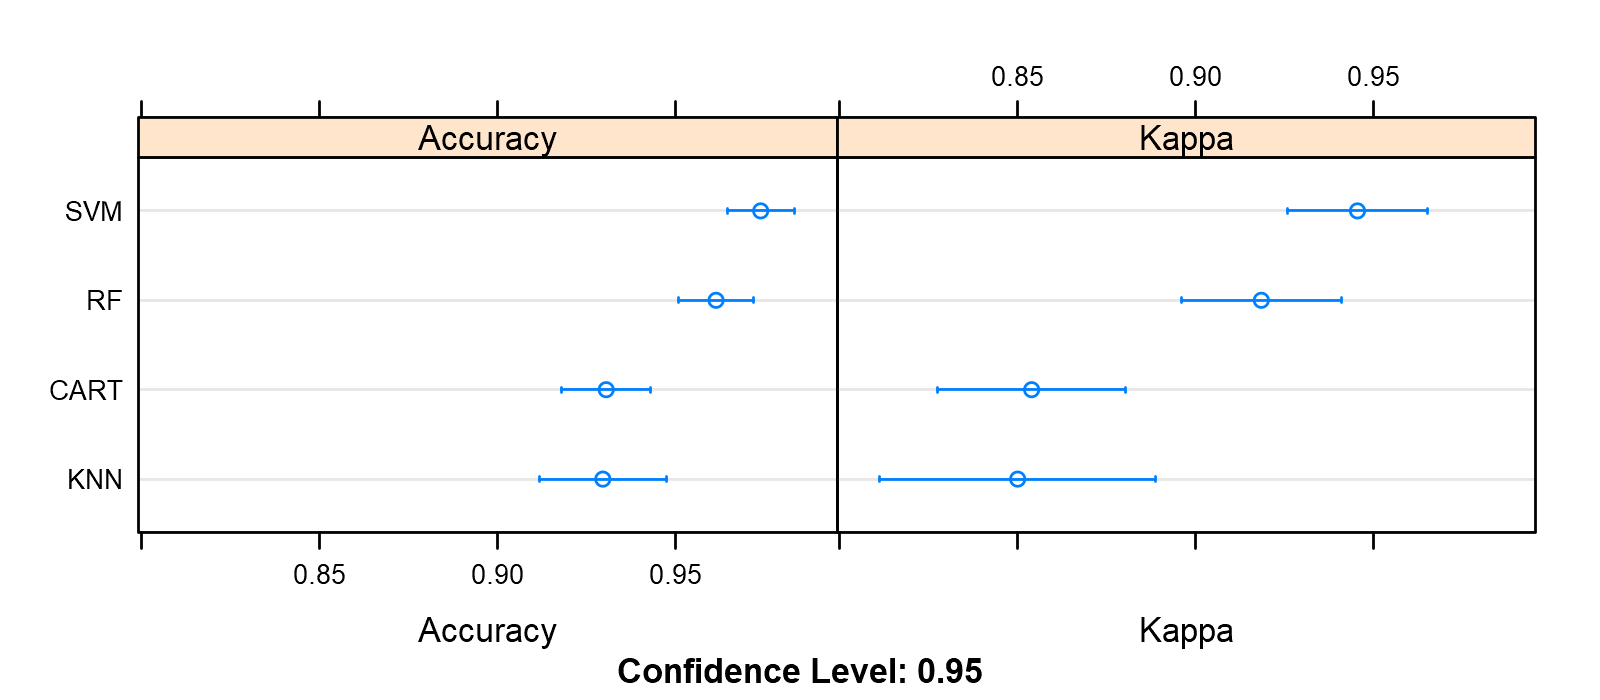

In [35]:
options(repr.plot.width=8, repr.plot.height=3.5,repr.plot.res = 200)
dotplot(results)

In [26]:
print(fit.svm)

Support Vector Machines with Radial Basis Function Kernel 

422 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 380, 379, 380, 380, 380, 380, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9541762  0.9043097
  0.50  0.9644032  0.9257878
  1.00  0.9738365  0.9453838

Tuning parameter 'sigma' was held constant at a value of 0.05171809
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.05171809 and C = 1.


### Choosing the best ML Classification Model

In [40]:
predictions_svm <- predict(fit.svm, test)
cf_svm = confusionMatrix(predictions_svm, test$diagnosis, positive = "M")

predictions_rf <- predict(fit.rf, test)
cf_rf = confusionMatrix(predictions_rf, test$diagnosis,positive = "M")

predictions_CART <- predict(fit.cart, test)
cf_CART = confusionMatrix(predictions_CART, test$diagnosis,positive = "M")

predictions_KNN <- predict(fit.knn, test)
cf_KNN = confusionMatrix(predictions_KNN, test$diagnosis,positive = "M")

In [48]:
data.frame("Model_Name" = c("SVM","Random Forests", "CART", "KNN"),
           "Accuracy" = c(cf_svm$overall[[1]],cf_rf$overall[[1]],cf_CART$overall[[1]],cf_KNN$overall[[1]]),
          "Kappa" = c(cf_svm$overall[[2]],cf_rf$overall[[2]],cf_CART$overall[[2]],cf_KNN$overall[[2]]),
           "Sensitivity" = c(cf_svm$byClass[[1]],cf_rf$byClass[[1]],cf_CART$byClass[[1]],cf_KNN$byClass[[1]]),
           "Specificity" = c(cf_svm$byClass[[2]],cf_rf$byClass[[2]],cf_CART$byClass[[2]],cf_KNN$byClass[[2]]),
           "Precision" = c(cf_svm$byClass[[5]],cf_rf$byClass[[5]],cf_CART$byClass[[5]],cf_KNN$byClass[[5]]),
           "Recall" =  c(cf_svm$byClass[[6]],cf_rf$byClass[[6]],cf_CART$byClass[[6]],cf_KNN$byClass[[6]])
          )

Model_Name     Accuracy  Kappa     Sensitivity Specificity Precision
1 SVM            0.9659864 0.9204287 0.9347826   0.9801980   0.9555556
2 Random Forests 0.9523810 0.8899112 0.9347826   0.9603960   0.9148936
3 CART           0.8911565 0.7438467 0.8043478   0.9306931   0.8409091
4 KNN            0.9319728 0.8417994 0.8913043   0.9504950   0.8913043
  Recall   
1 0.9347826
2 0.9347826
3 0.8043478
4 0.8913043

We would ideally want a model that has the ability to predict correctly if the person has malignant, breast tissue or not. From my own research, I found that malignant is cancerous and deadly whereas benign is non cancerous. Focussing on the Accuracy, Kappa, and Sensitivity, it appears that SVM is the best possible ML Classification model for this dataset to accurately predict if the person has malignant or not.

## **References**

- Fayed, L. (2021, May 9). Differences Between a Malignant and Benign Tumor. Verywell Health. https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240

- Pietrangelo, A. (2019, October 23). Benign and Malignant Tumors: How Do They Differ? Healthline. https://www.healthline.com/health/cancer/difference-between-benign-and-malignant-tumors

- Bonaccorso, G. (2020). Mastering Machine Learning Algorithms: Expert techniques for implementing popular machine learning algorithms, fine-tuning your models, and understanding how they work.

- Galvan, J., & Safari, an O'Reilly Media Company. (2021). Data Science and Machine Learning with R from A-Z Course [Updated for 2021].